In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('finished_data.csv')
data.head()

,Protocol_number,Product,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,...,Component_126,Component_127,Component_128,Component_129,Component_130,Component_131,Component_132,Days_analysis,Year,Samples_number
0,8107,427,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,23.0,2020,218
1,4553,427,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,23.0,2020,218
2,9831,427,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18.0,2020,163
3,10580,427,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16.0,2020,360
4,1238,427,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,27.0,2020,234


In [3]:
data.head().transpose()

,0,1,2,3,4
Protocol_number,8107.0,4553.0,9831.0,10580.0,1238.0
Product,427.0,427.0,427.0,427.0,427.0
Component_1,1.0,1.0,1.0,1.0,1.0
Component_2,0.0,0.0,0.0,0.0,0.0
Component_3,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
Component_131,0.0,0.0,0.0,0.0,0.0
Component_132,0.0,0.0,0.0,0.0,0.0
Days_analysis,23.0,23.0,18.0,16.0,27.0
Year,2020.0,2020.0,2020.0,2020.0,2020.0


In [4]:
data.describe()

,Protocol_number,Product,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,...,Component_126,Component_127,Component_128,Component_129,Component_130,Component_131,Component_132,Days_analysis,Year,Samples_number
count,23478.000000,23478.000000,23478.000000,23478.000000,23478.000000,23478.000000,23478.000000,23478.000000,23478.000000,23478.000000,...,23478.000000,23478.000000,23478.000000,23478.000000,23478.000000,23478.000000,23478.000000,23478.000000,23478.000000,23478.000000
mean,11607.193969,317.309524,0.150311,0.212625,0.238606,0.206023,0.184982,0.286737,0.261564,0.204958,...,0.000639,0.003578,0.005750,0.000383,0.000085,0.000043,0.008859,23.611935,2019.110955,266.791038
std,6638.486449,126.565430,0.357384,0.409173,0.426241,0.404456,0.388291,0.452247,0.441430,0.403679,...,0.025269,0.059709,0.075612,0.019576,0.009229,0.006526,0.093708,21.904879,2.164429,185.866344
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000
25%,5865.250000,221.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2018.000000,155.000000
50%,11673.500000,305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,2019.000000,258.000000
75%,17401.750000,414.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,2021.000000,360.000000
max,22881.000000,569.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,250.000000,2023.000000,1137.000000


Удалим колонки номера протокола и код продукта для проверки.

In [5]:
check_colum = data.columns.to_list()
rm_list = ['Protocol_number', 'Product']
for i in rm_list:
    check_colum.remove(i)

Проверим в каких признаках значения больше или равны 2. Ожидалось что все признаки по компонентам будут равны 0 или 1.

In [6]:
susp_list = []
for col in check_colum:
    if data[col].max() > 1:
        print(f'Column "{col}" maximum "{data[col].max()}"');
        susp_list.append(col)
print(susp_list)

Column "Component_7" maximum "2"
Column "Component_17" maximum "2"
Column "Component_38" maximum "2"
Column "Component_54" maximum "2"
Column "Component_57" maximum "2"
Column "Days_analysis" maximum "250.0"
Column "Year" maximum "2023"
Column "Samples_number" maximum "1137"
['Component_7', 'Component_17', 'Component_38', 'Component_54', 'Component_57', 'Days_analysis', 'Year', 'Samples_number']


По результатам анализа выяснилось, это произошло из-за того, что проводился анализ по компоненту 2-я разными методами.

# Распределение значений по всем признакам

Column "Component_1" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


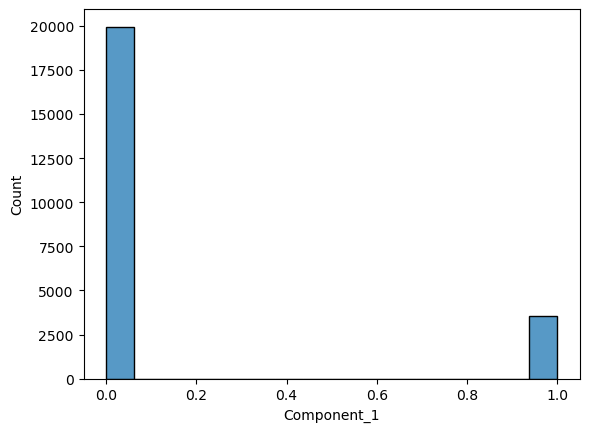

Column "Component_2" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


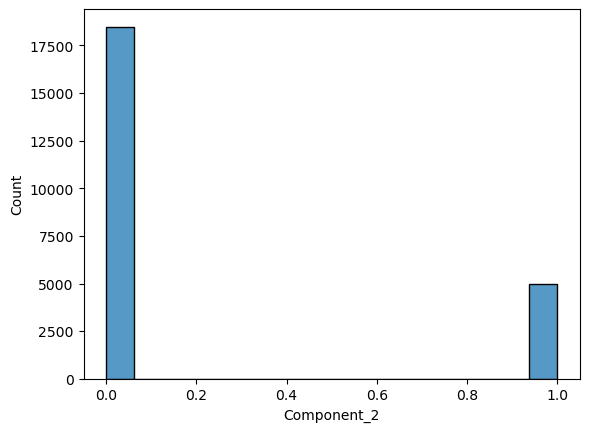

Column "Component_3" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


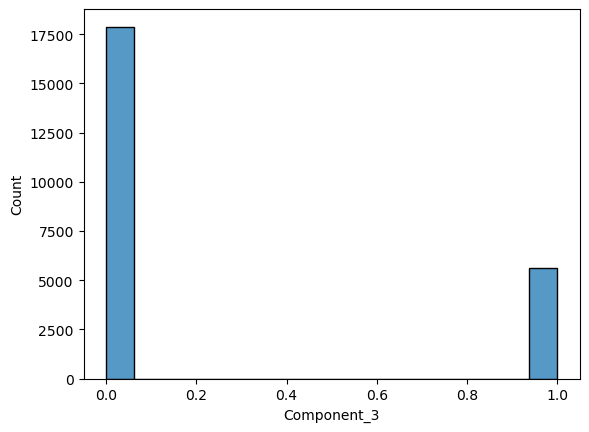

Column "Component_4" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


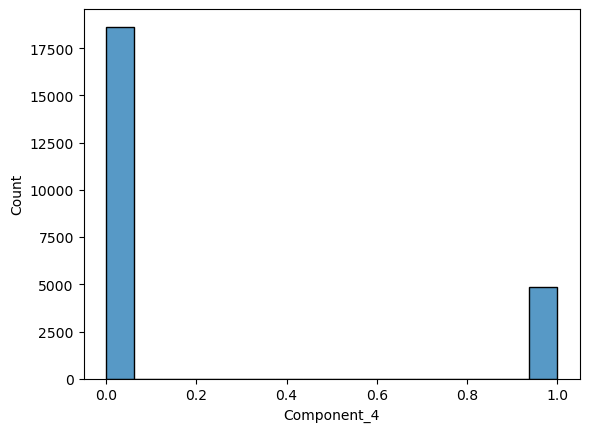

Column "Component_5" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


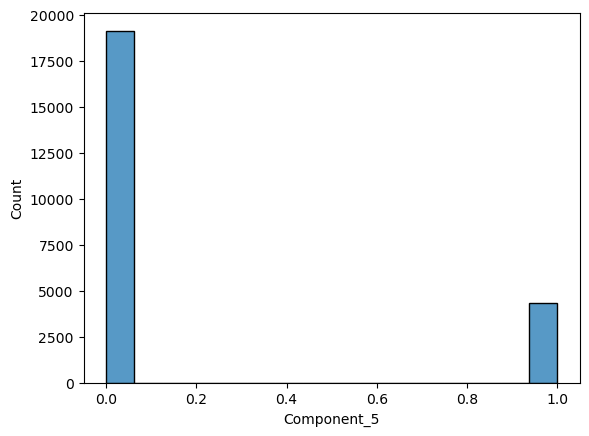

Column "Component_6" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


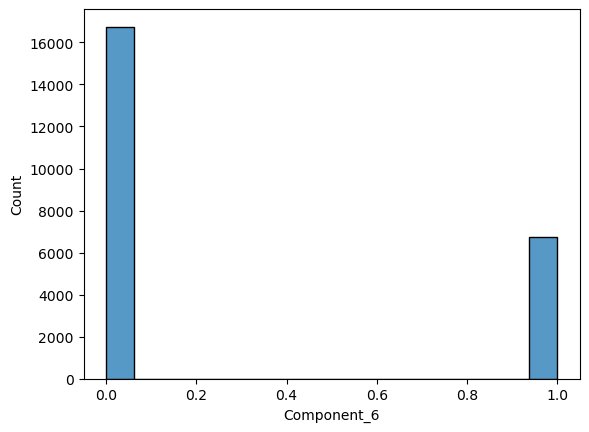

Column "Component_7" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


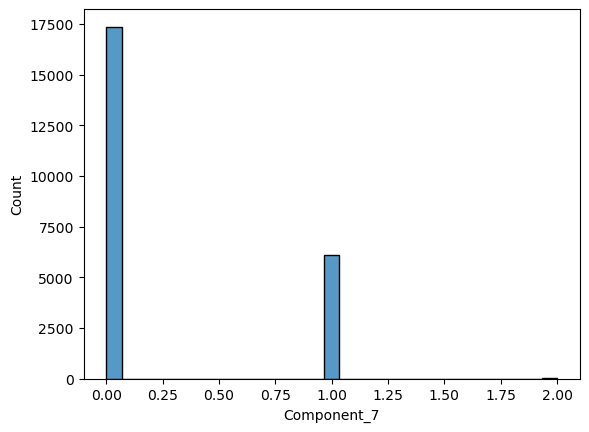

Column "Component_8" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


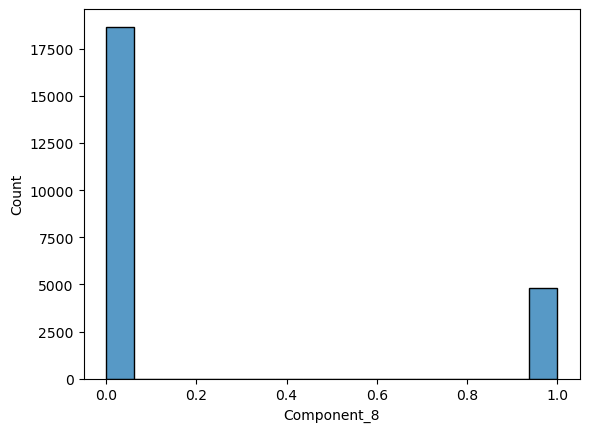

Column "Component_9" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


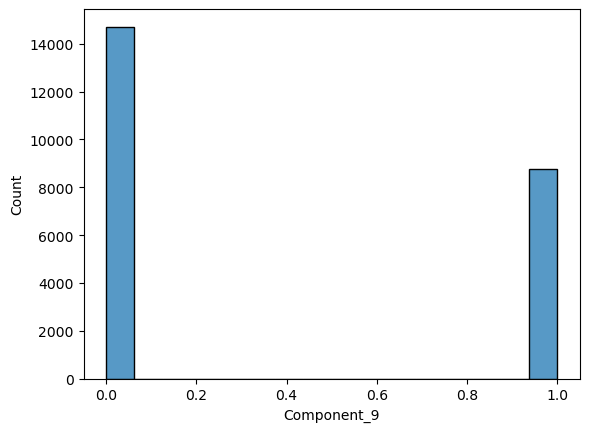

Column "Component_10" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


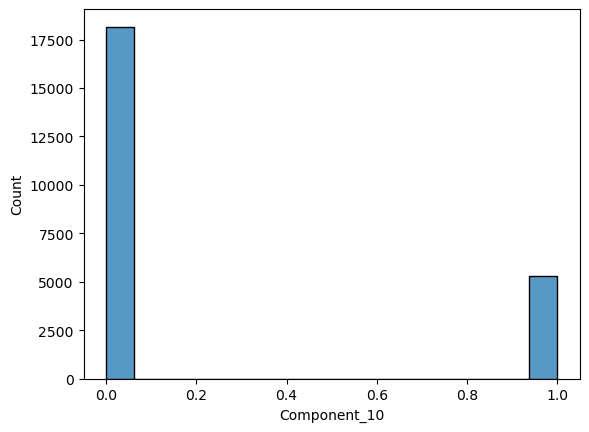

Column "Component_11" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


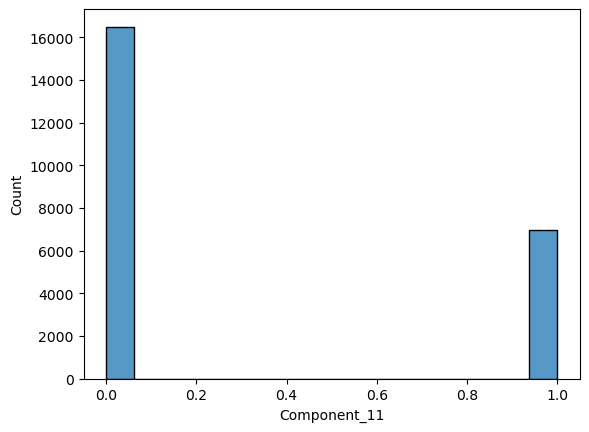

Column "Component_12" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


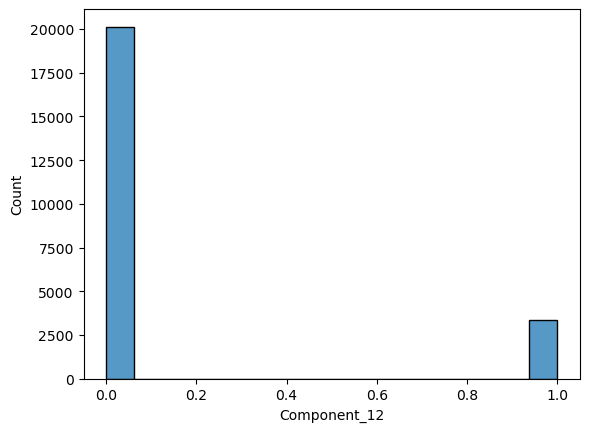

Column "Component_13" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


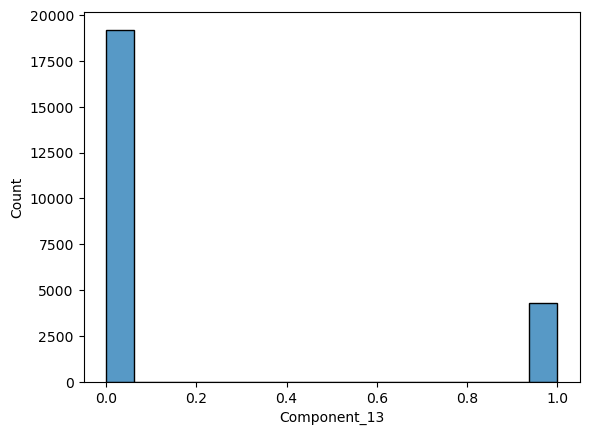

Column "Component_14" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


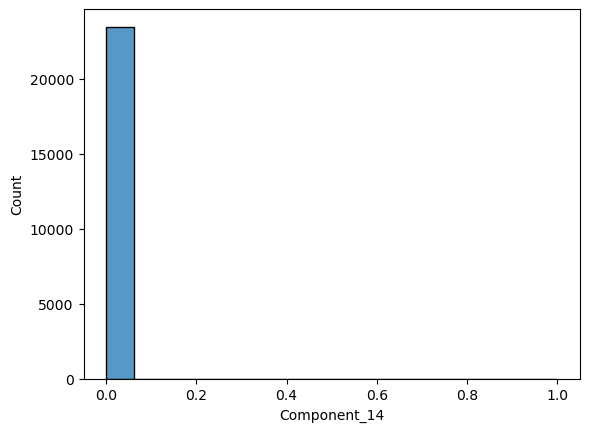

Column "Component_15" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


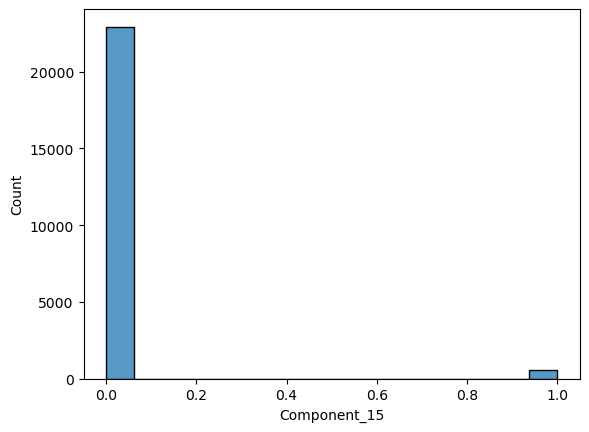

Column "Component_16" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


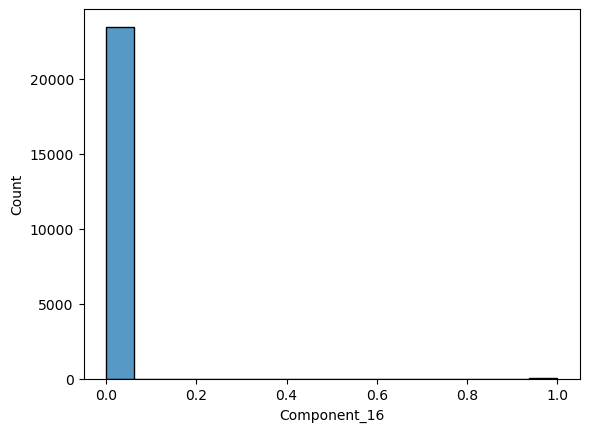

Column "Component_17" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


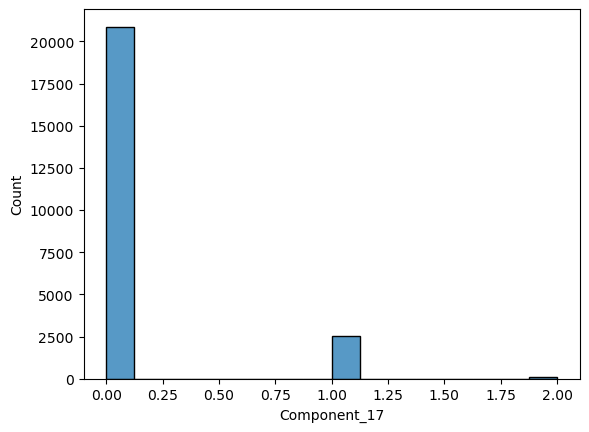

Column "Component_18" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


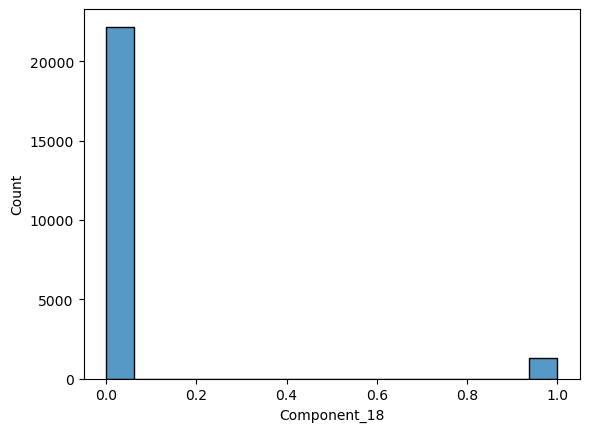

Column "Component_19" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


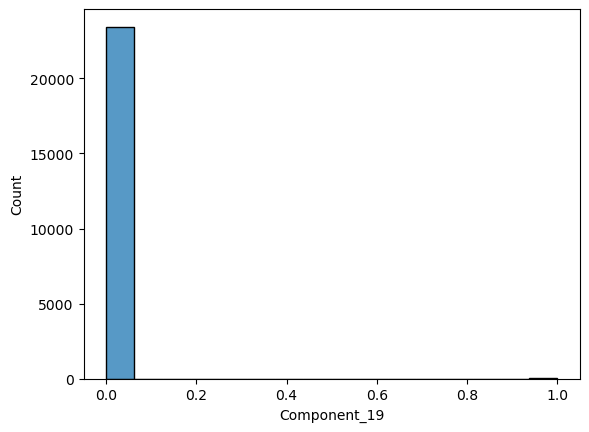

Column "Component_20" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


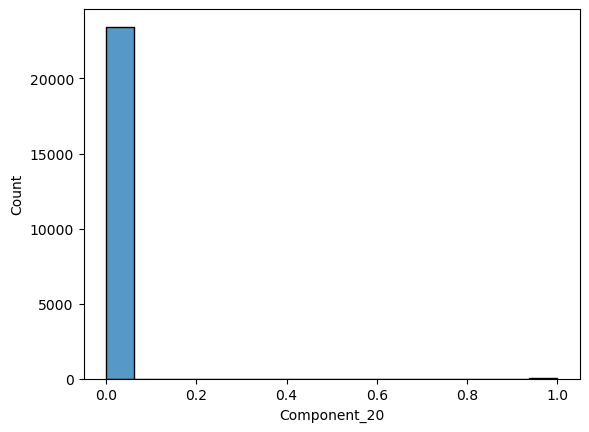

Column "Component_21" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


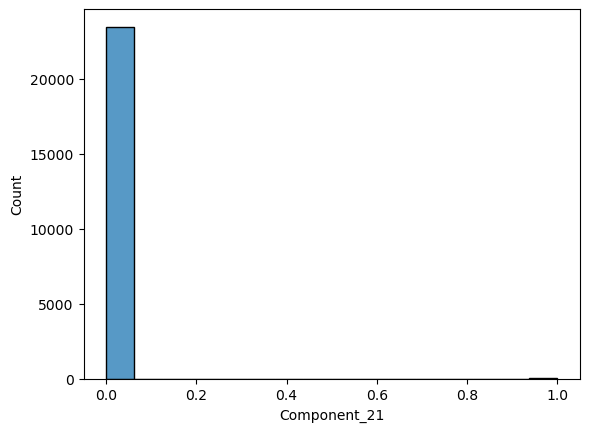

Column "Component_22" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


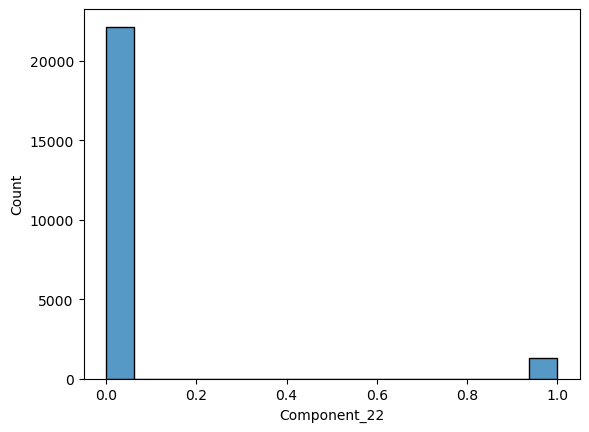

Column "Component_23" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


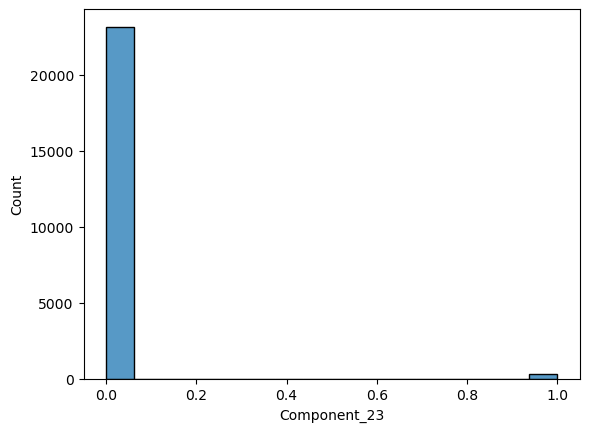

Column "Component_24" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


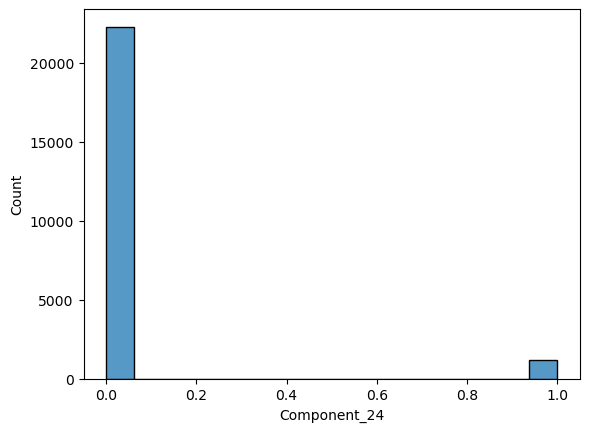

Column "Component_25" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


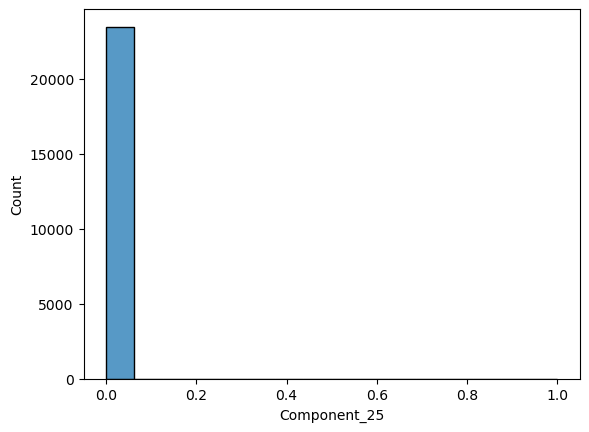

Column "Component_26" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


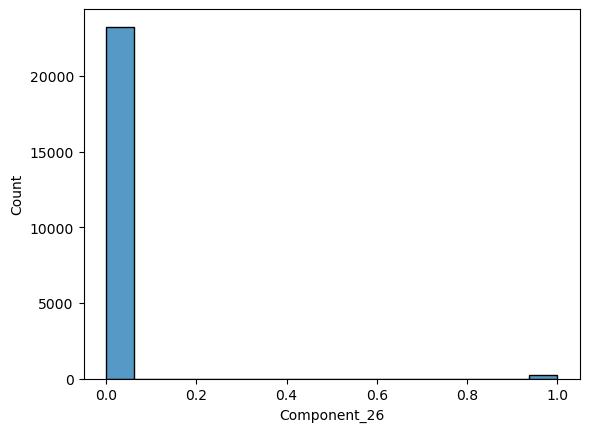

Column "Component_27" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


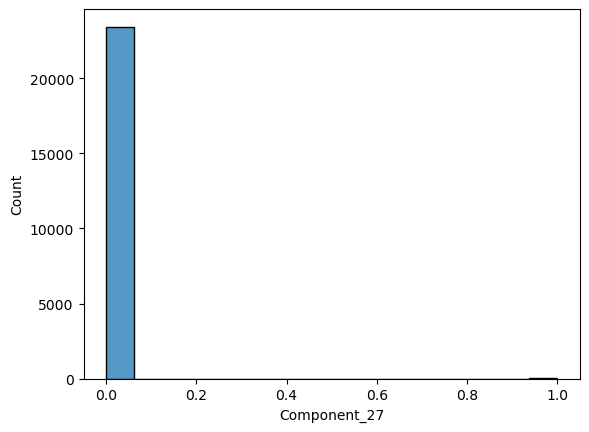

Column "Component_28" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


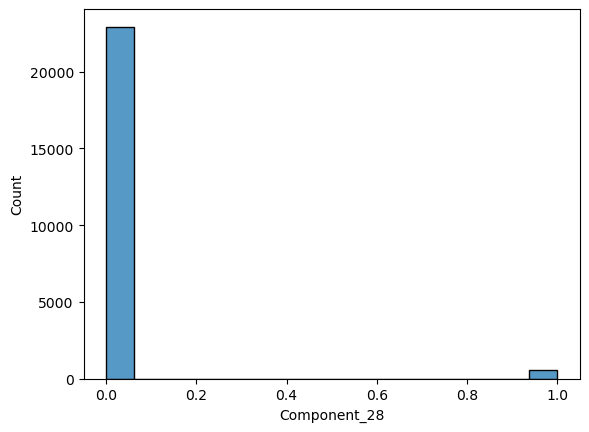

Column "Component_29" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


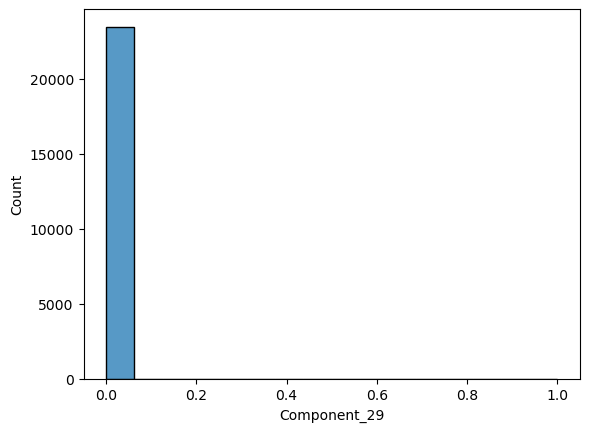

Column "Component_30" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


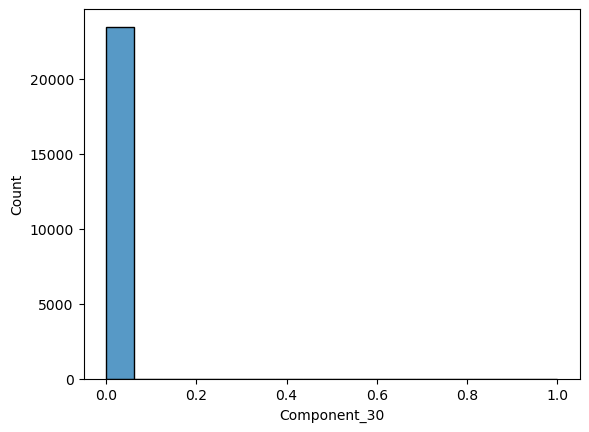

Column "Component_31" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


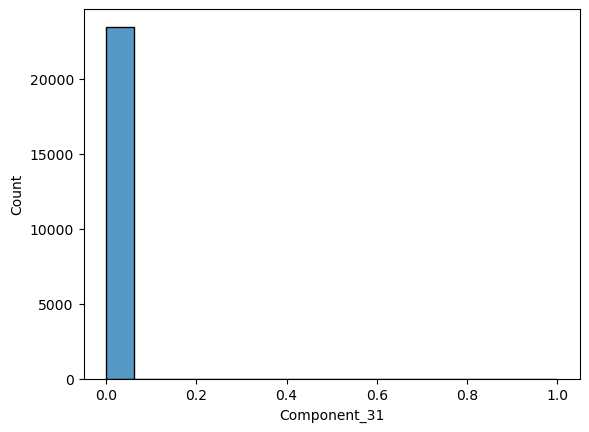

Column "Component_32" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


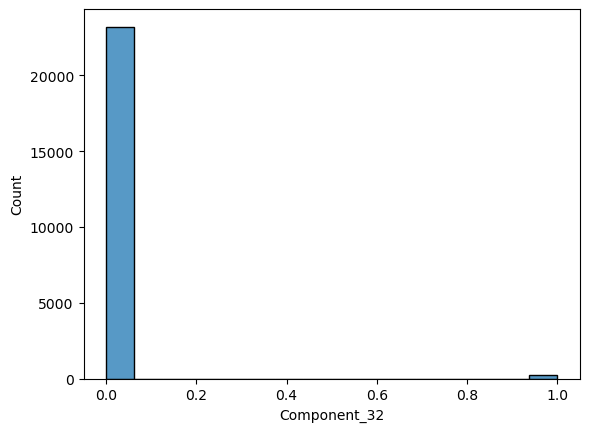

Column "Component_33" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


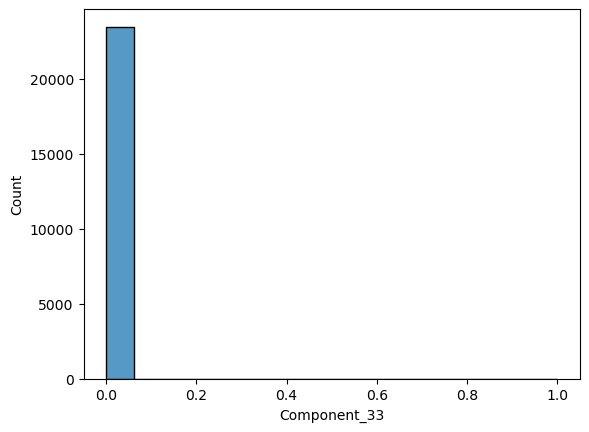

Column "Component_34" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


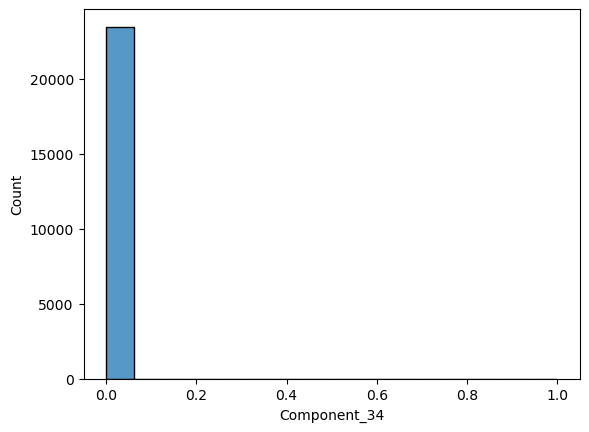

Column "Component_35" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


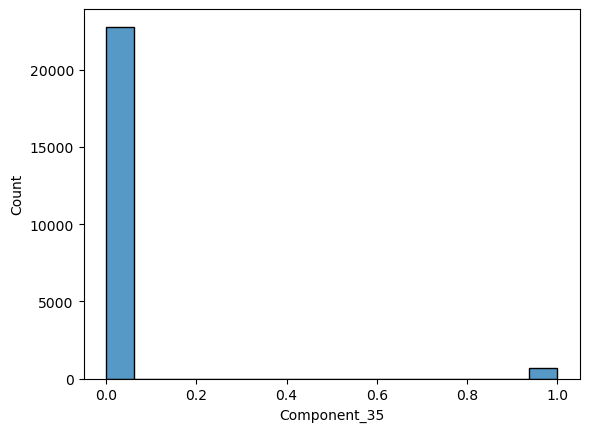

Column "Component_36" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


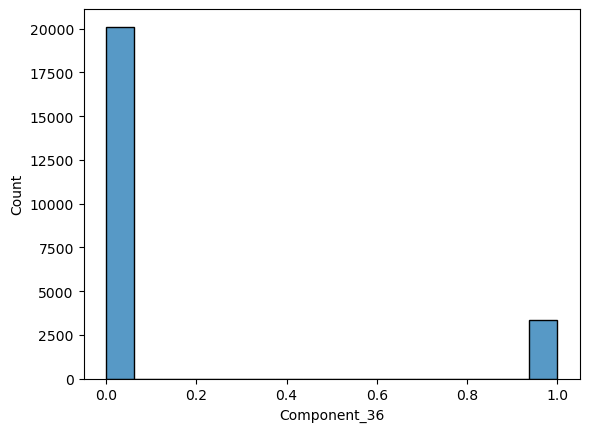

Column "Component_37" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


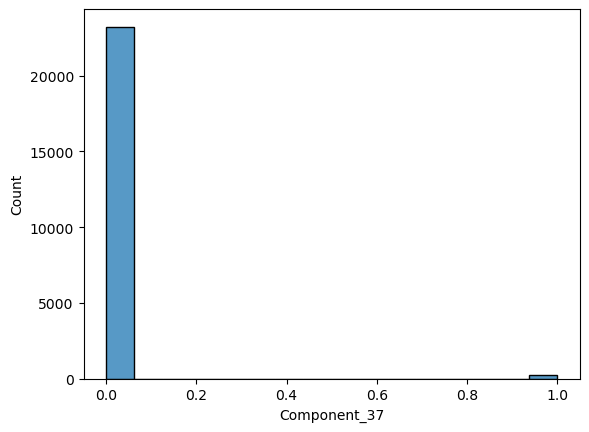

Column "Component_38" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


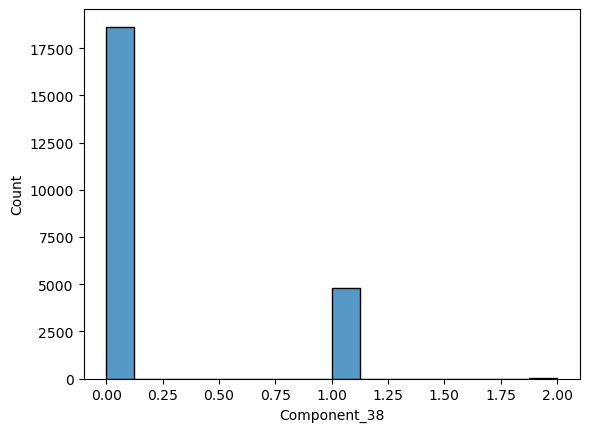

Column "Component_39" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


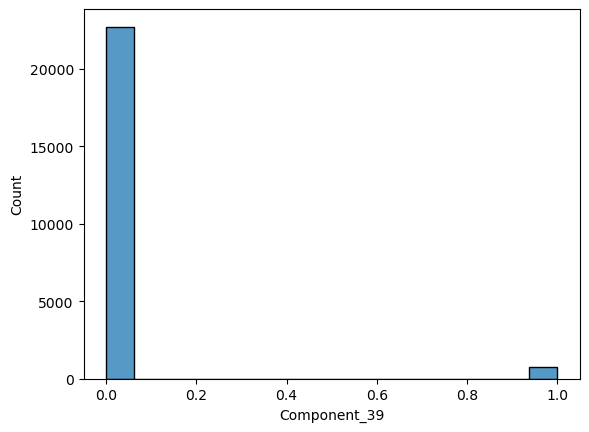

Column "Component_40" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


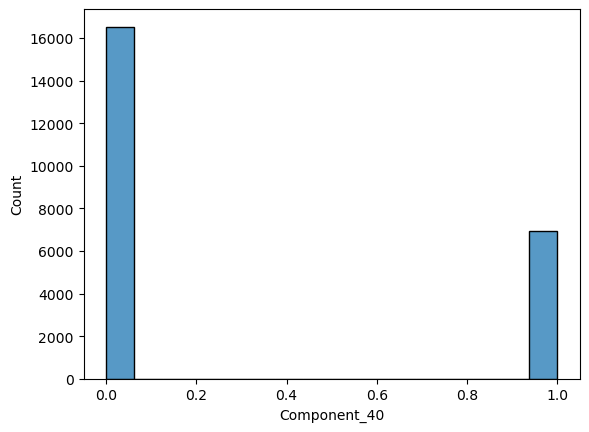

Column "Component_41" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


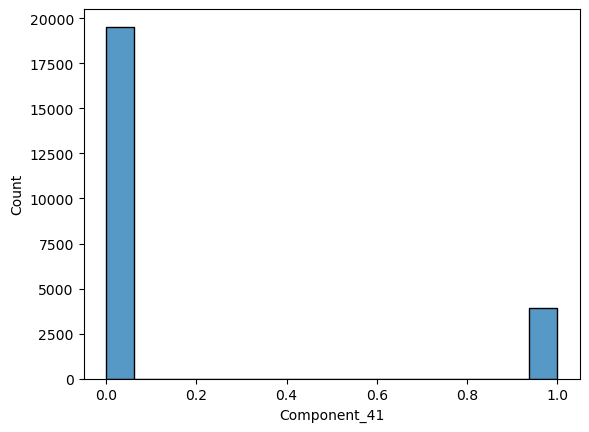

Column "Component_42" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


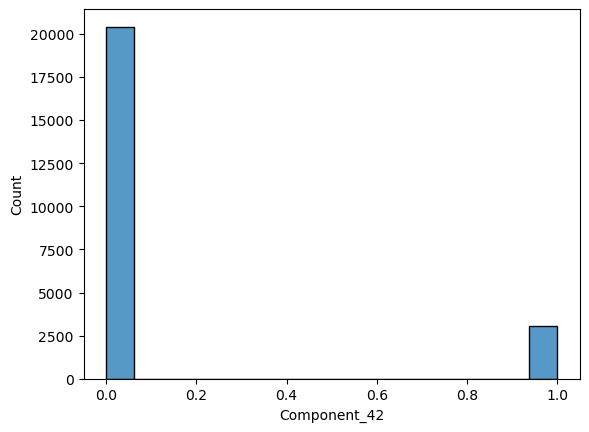

Column "Component_43" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


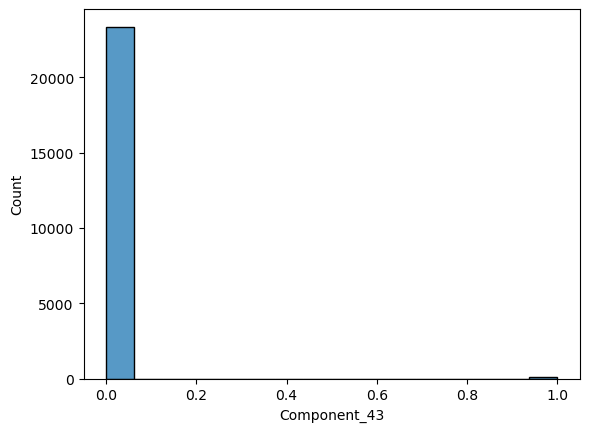

Column "Component_44" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


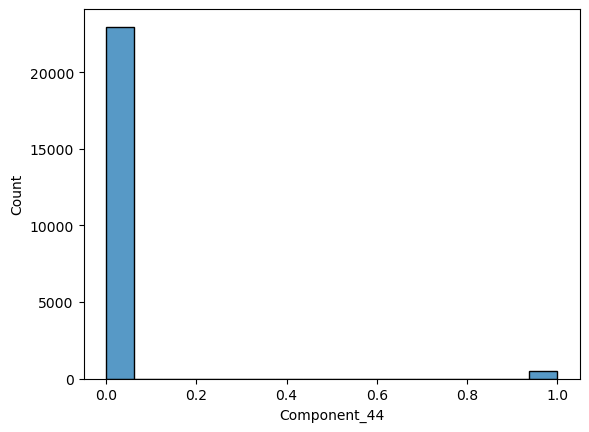

Column "Component_45" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


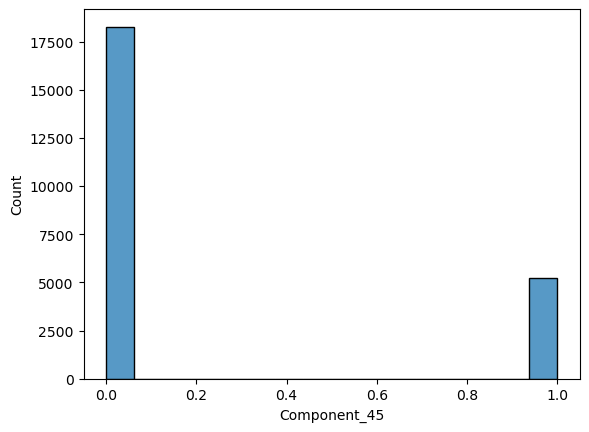

Column "Component_46" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


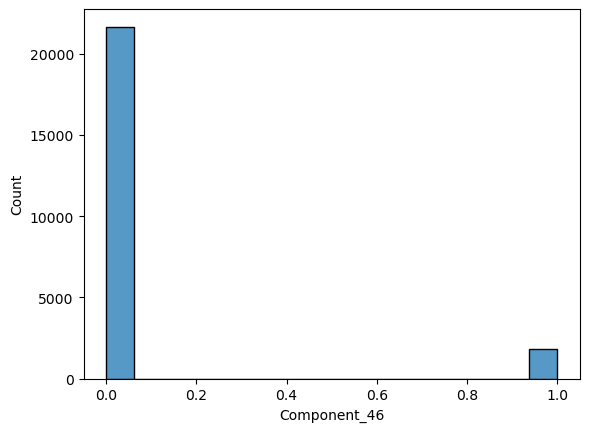

Column "Component_47" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


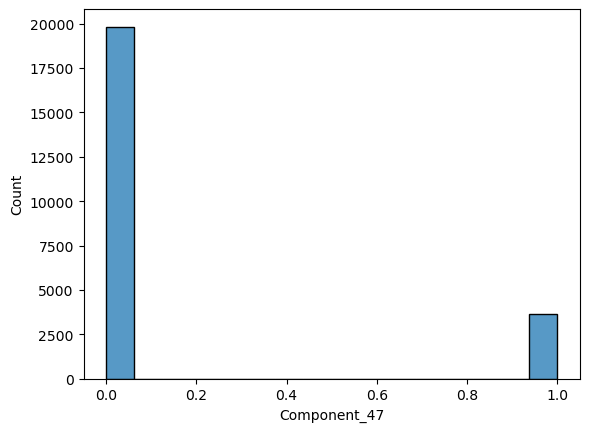

Column "Component_48" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


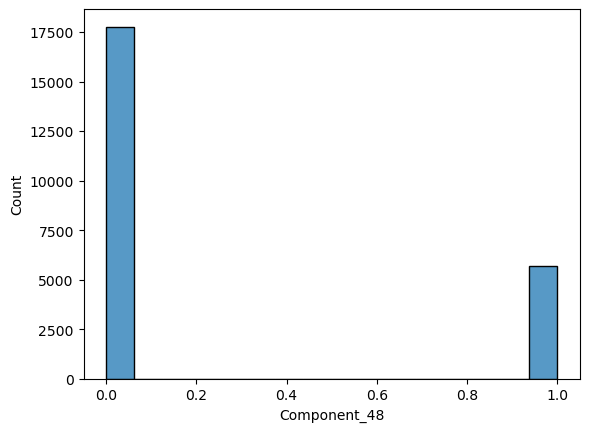

Column "Component_49" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


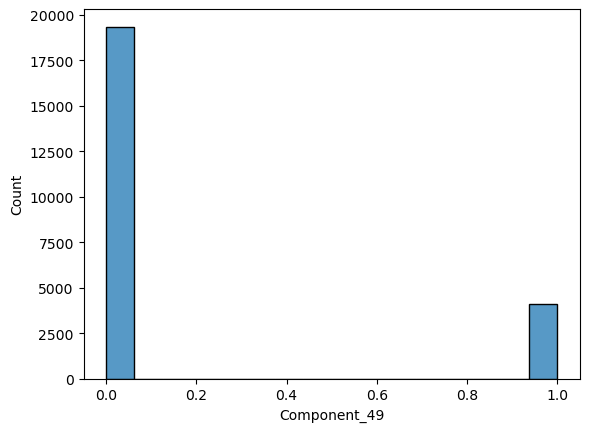

Column "Component_50" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


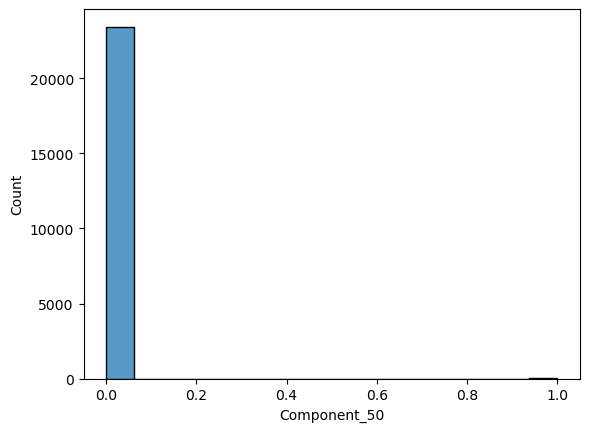

Column "Component_51" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


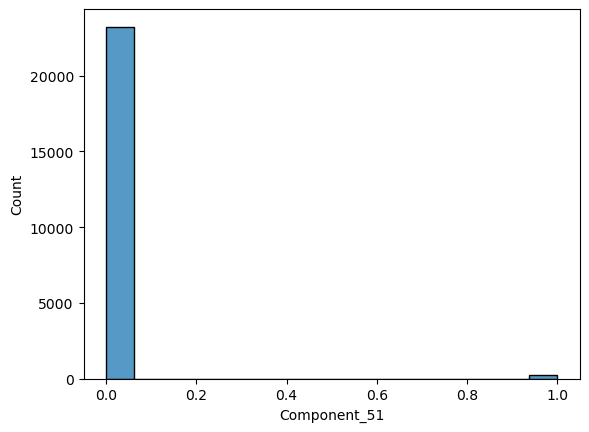

Column "Component_52" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


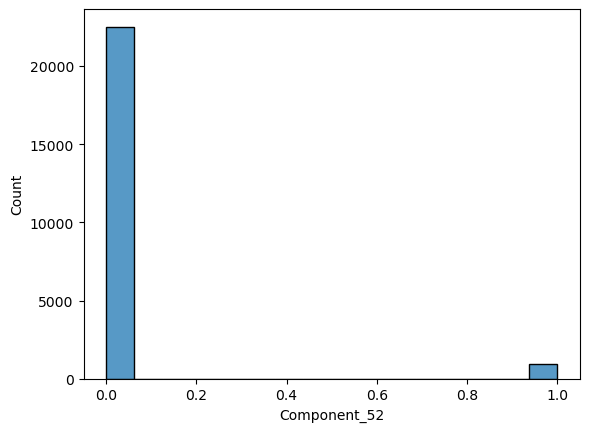

Column "Component_53" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


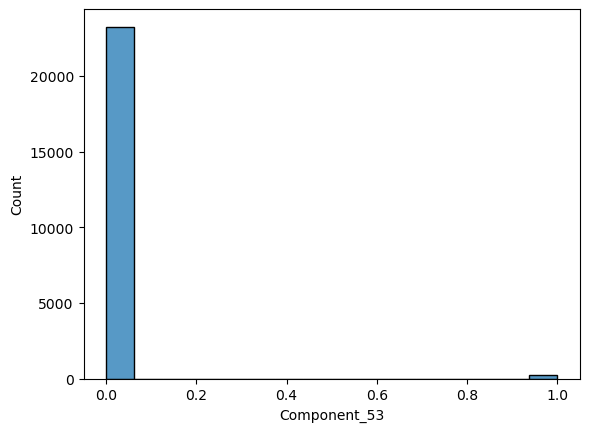

Column "Component_54" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


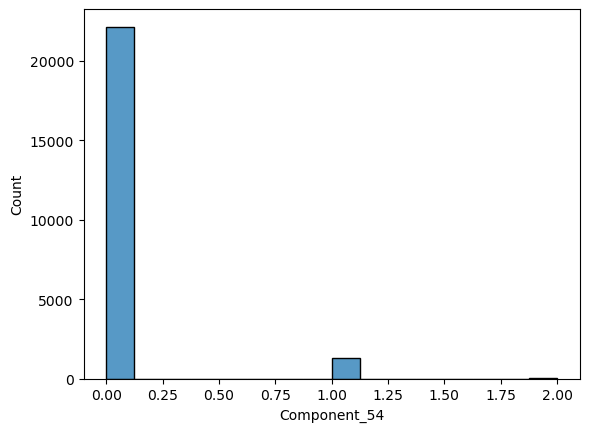

Column "Component_55" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


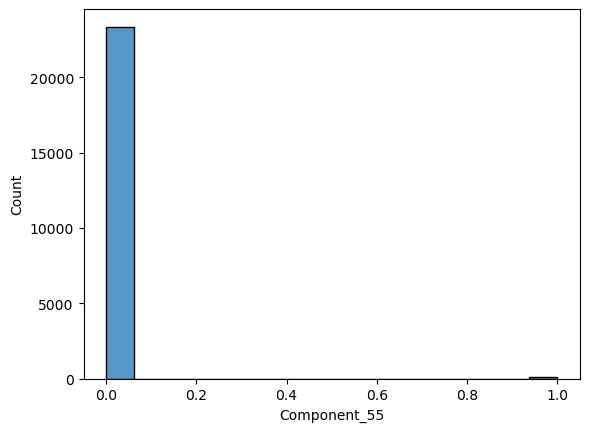

Column "Component_56" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


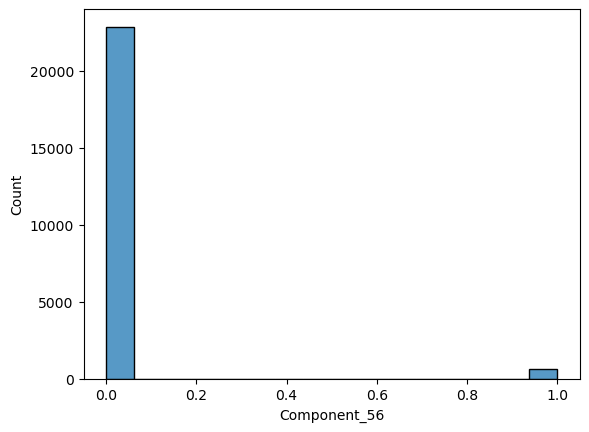

Column "Component_57" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


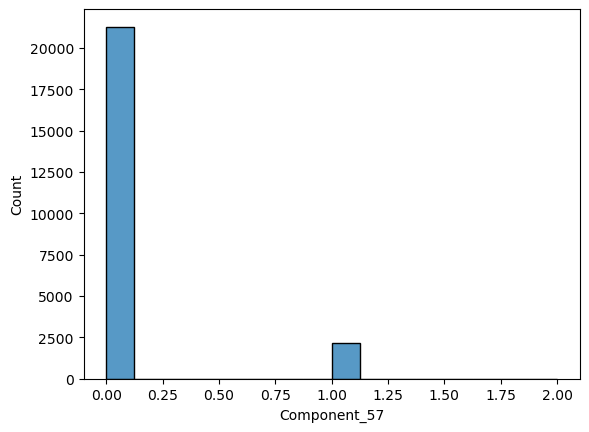

Column "Component_58" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


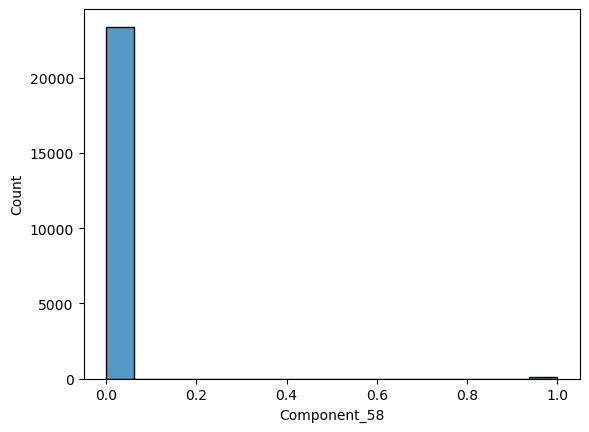

Column "Component_59" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


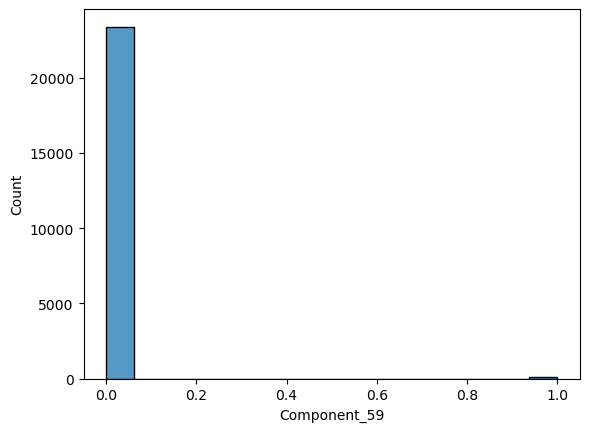

Column "Component_60" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


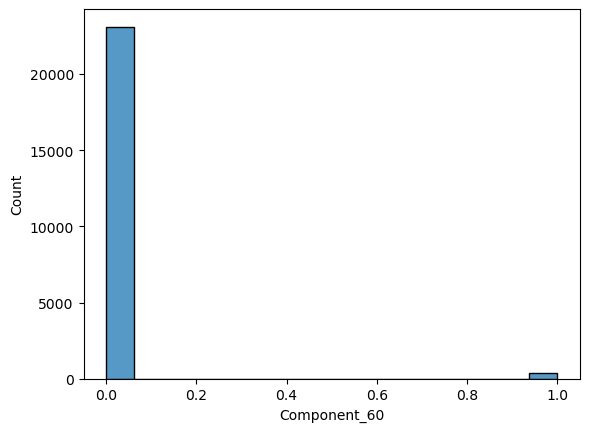

Column "Component_61" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


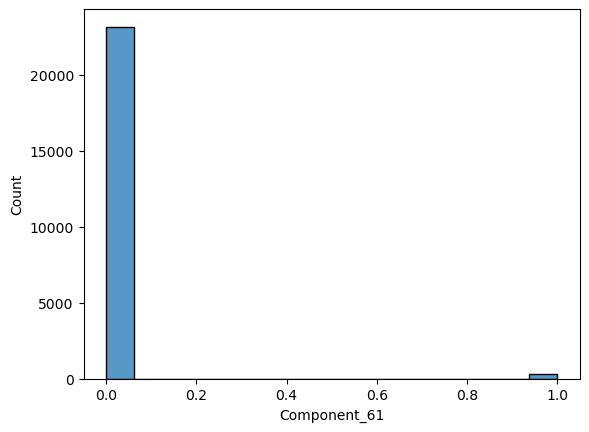

Column "Component_62" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


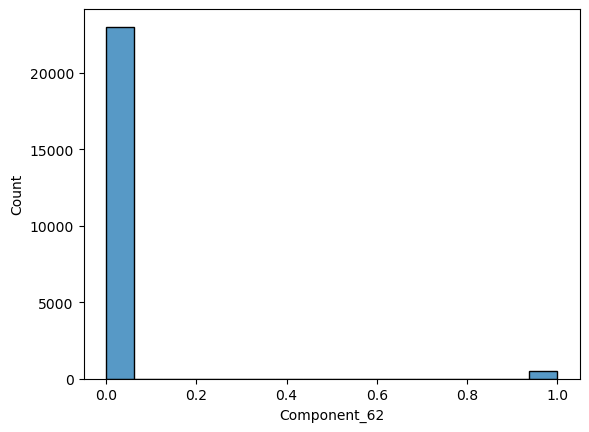

Column "Component_63" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


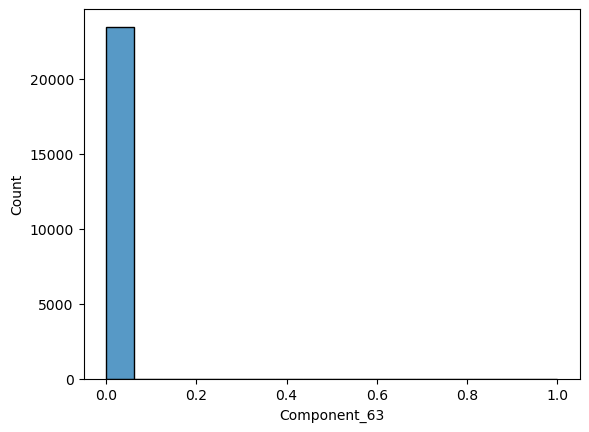

Column "Component_64" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


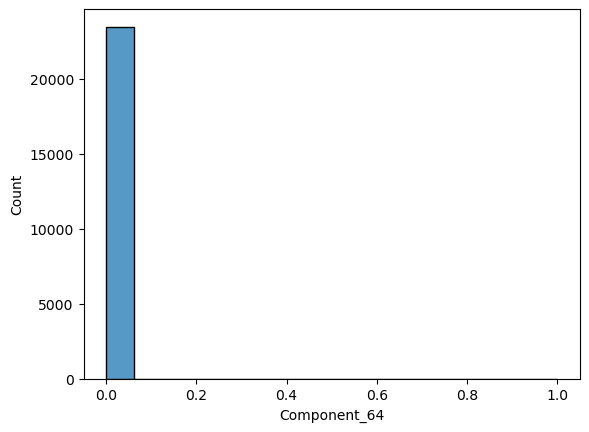

Column "Component_65" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


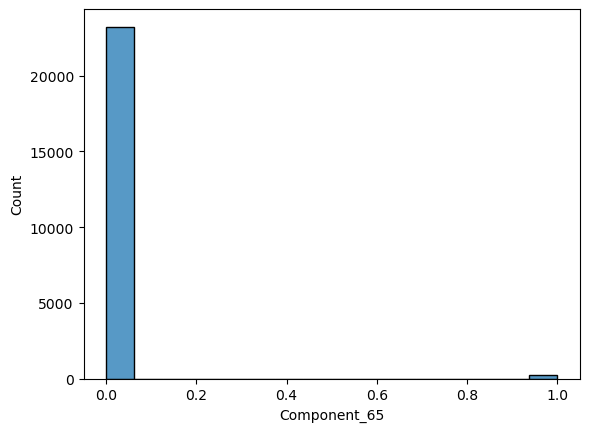

Column "Component_66" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


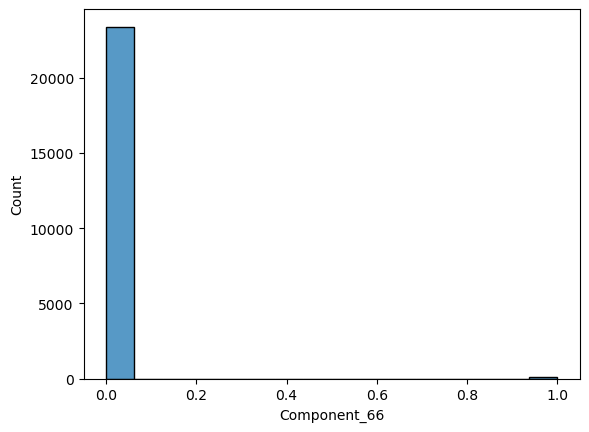

Column "Component_67" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


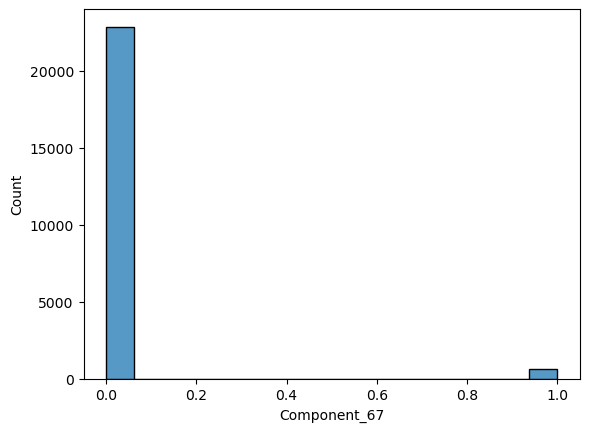

Column "Component_68" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


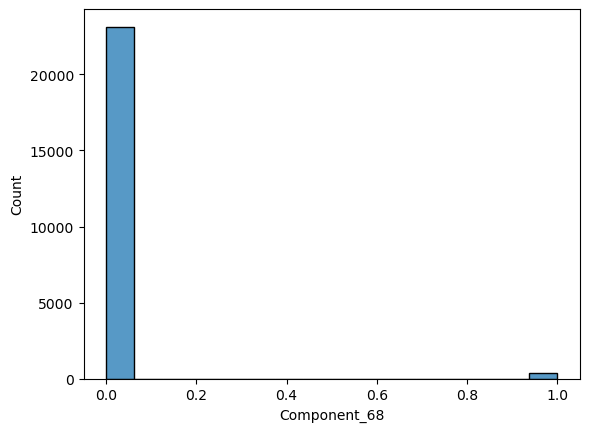

Column "Component_69" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


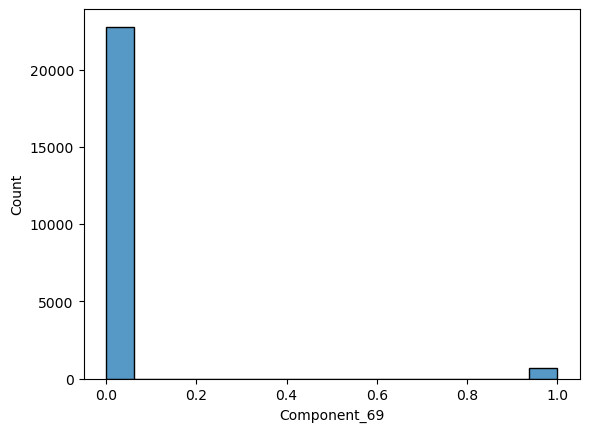

Column "Component_70" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


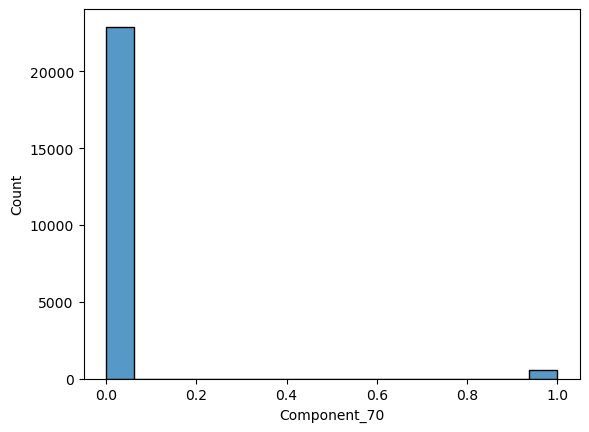

Column "Component_71" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


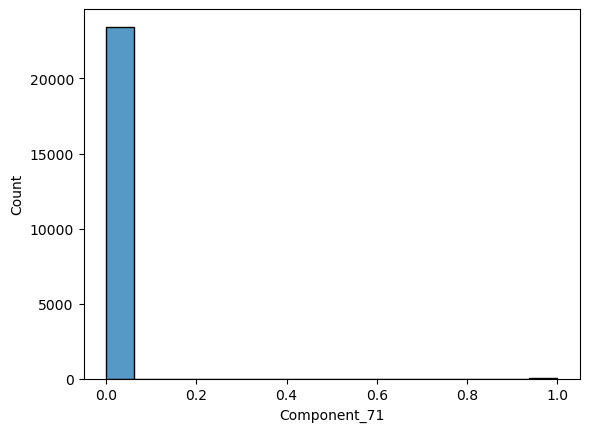

Column "Component_72" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


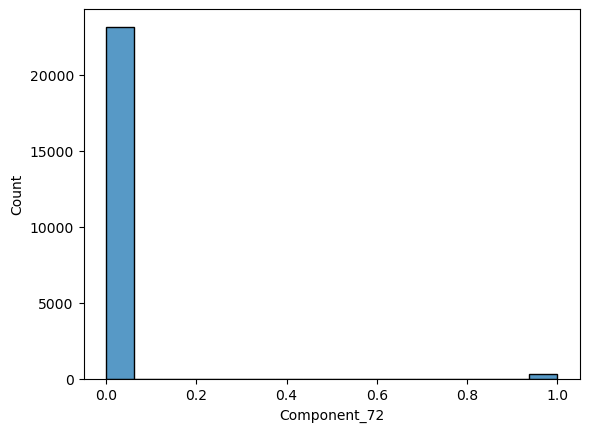

Column "Component_73" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


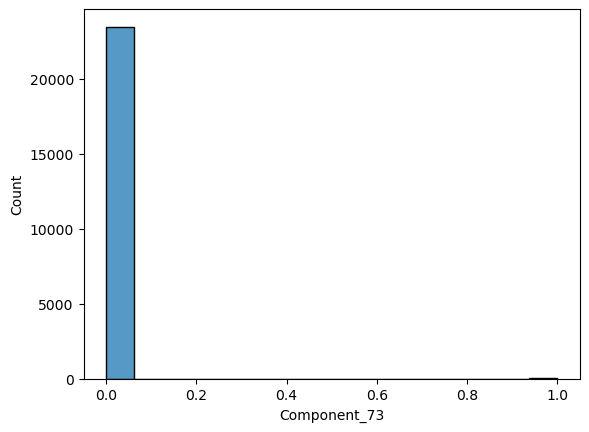

Column "Component_74" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


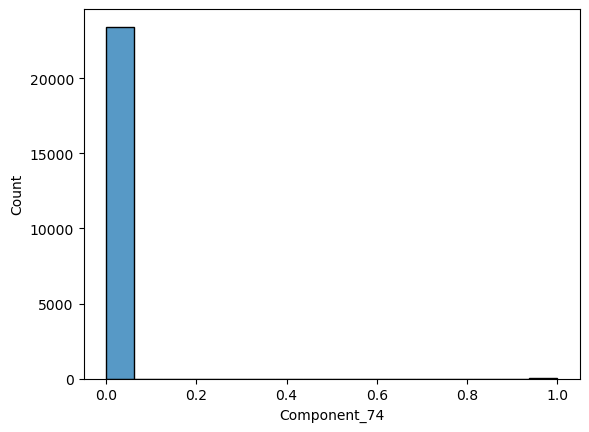

Column "Component_75" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


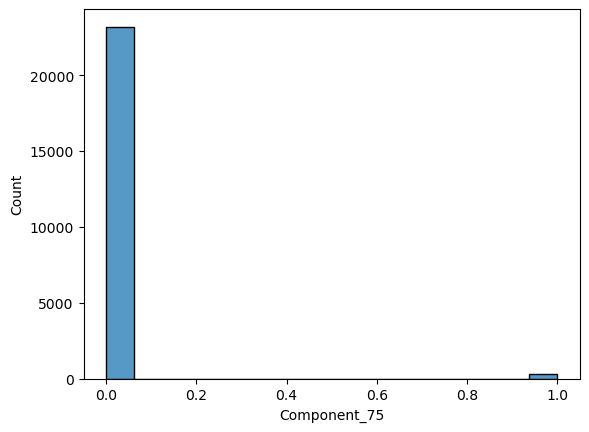

Column "Component_76" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


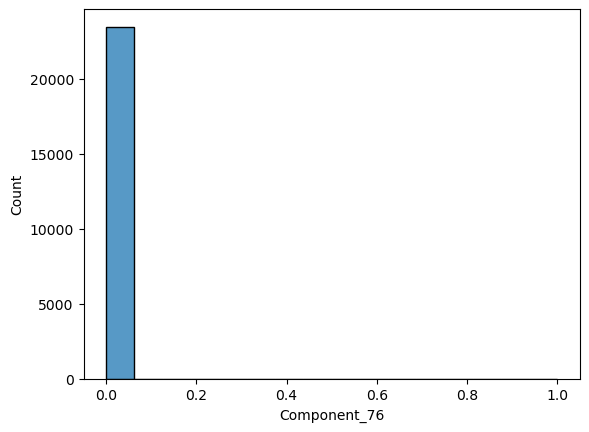

Column "Component_77" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


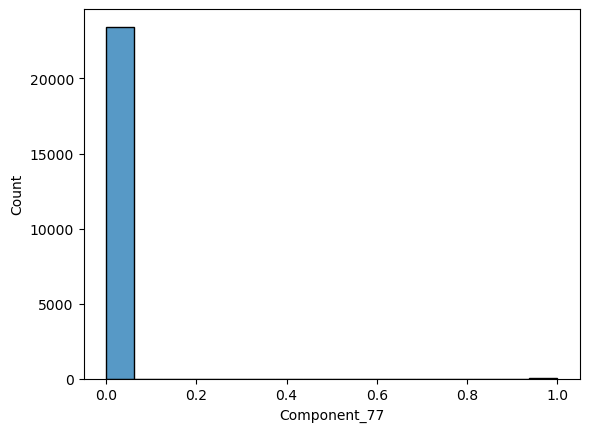

Column "Component_78" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


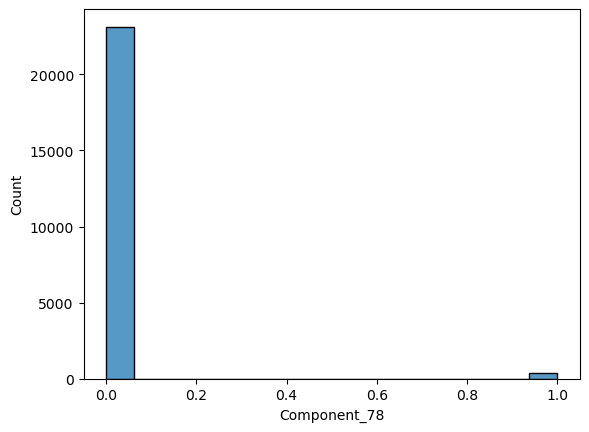

Column "Component_79" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


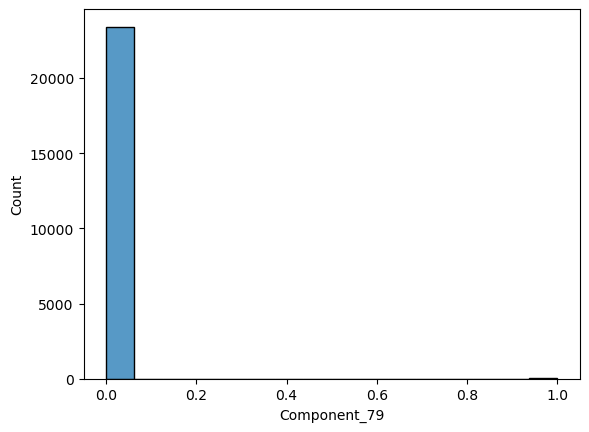

Column "Component_80" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


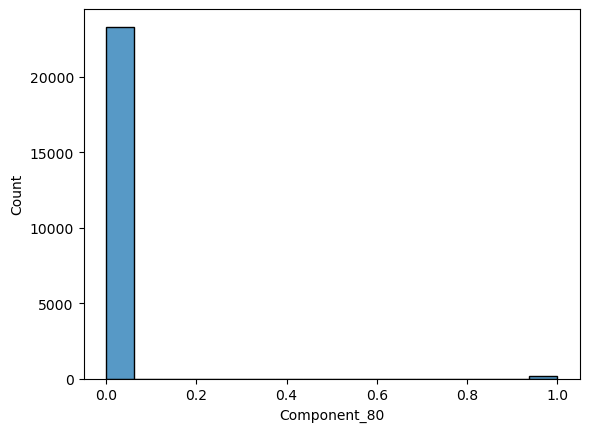

Column "Component_81" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


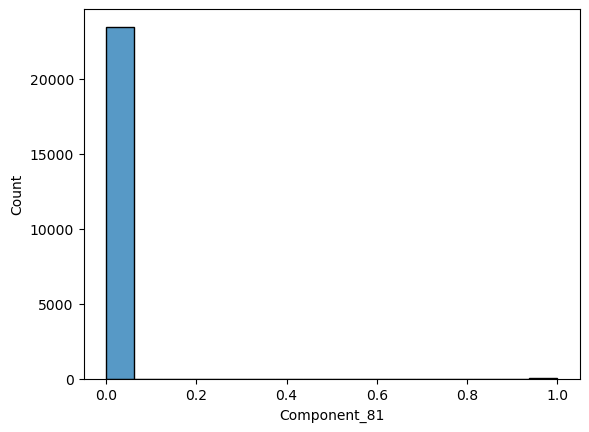

Column "Component_82" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


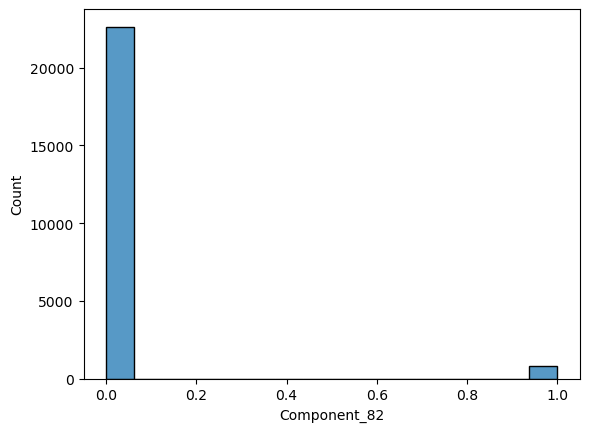

Column "Component_83" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


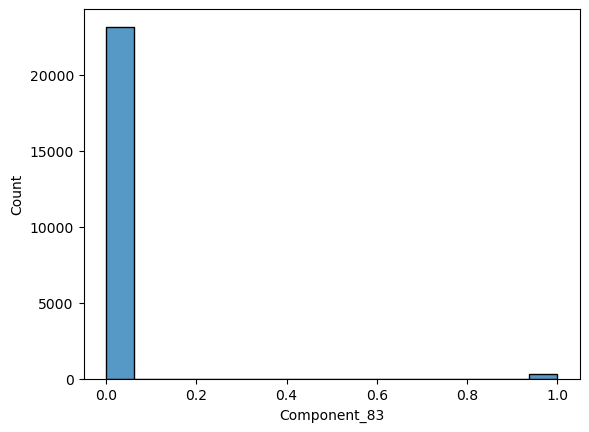

Column "Component_84" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


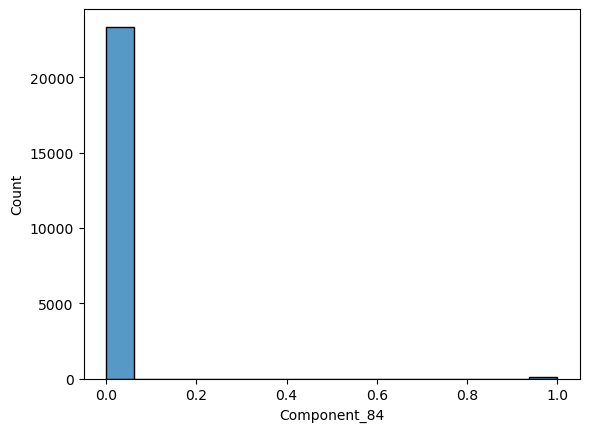

Column "Component_85" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


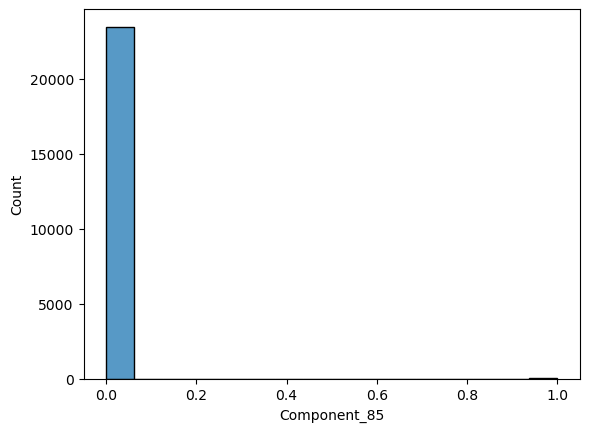

Column "Component_86" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


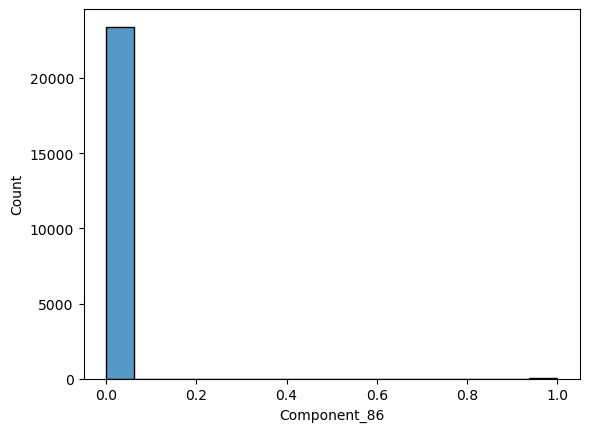

Column "Component_87" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


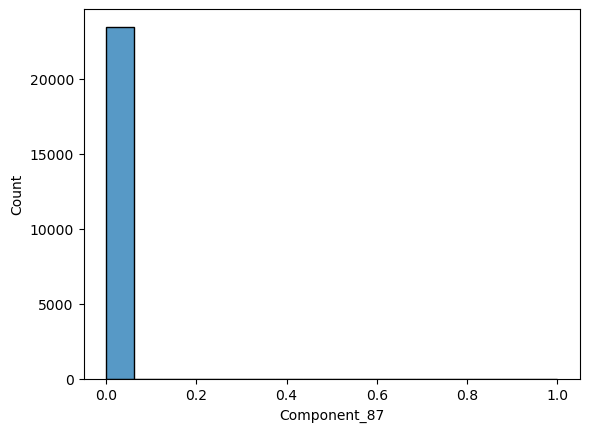

Column "Component_88" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


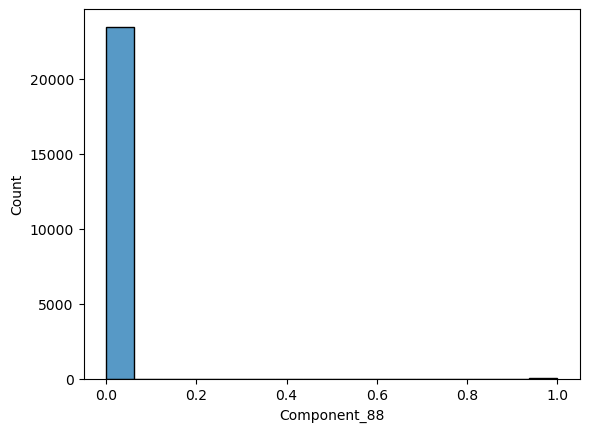

Column "Component_89" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


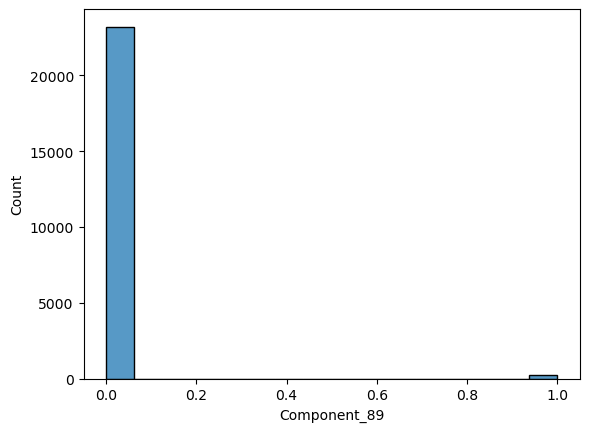

Column "Component_90" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


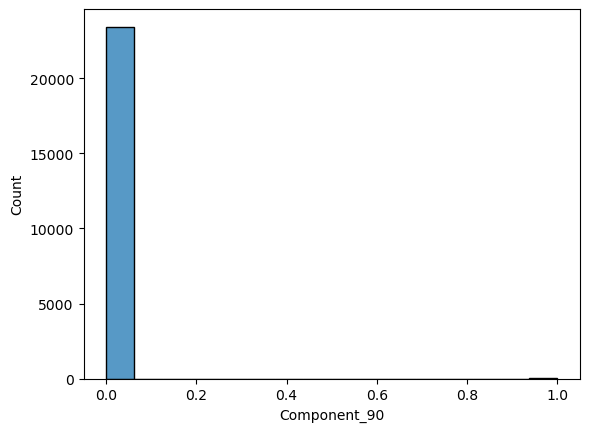

Column "Component_91" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


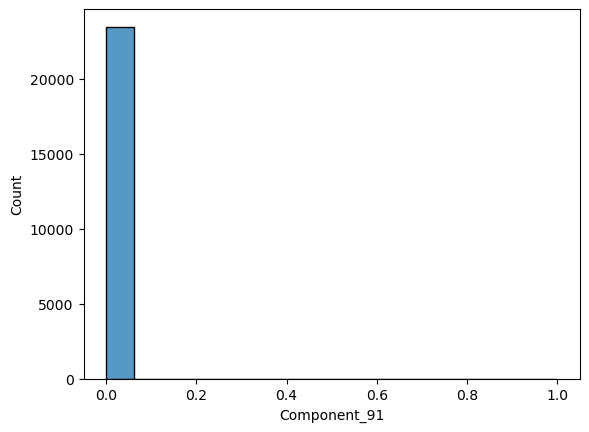

Column "Component_92" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


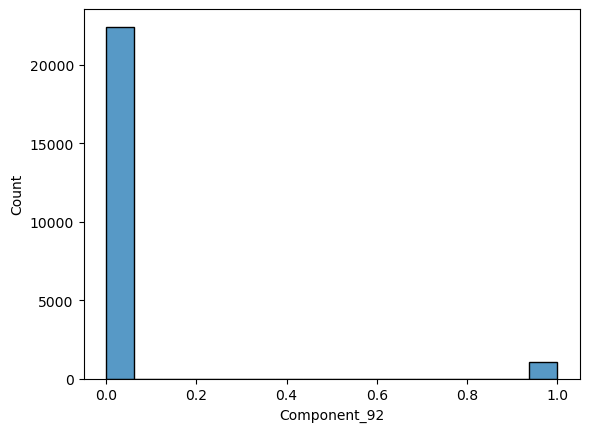

Column "Component_93" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


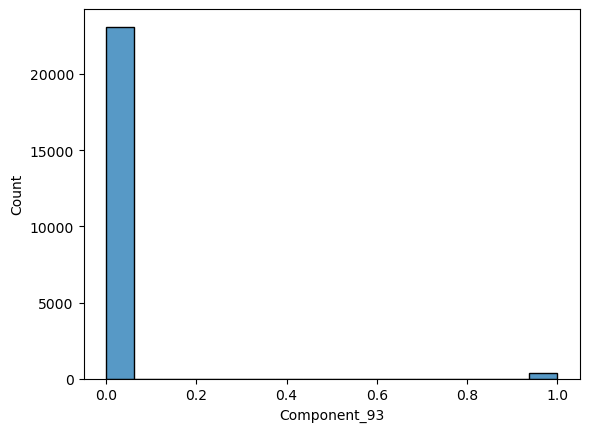

Column "Component_94" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


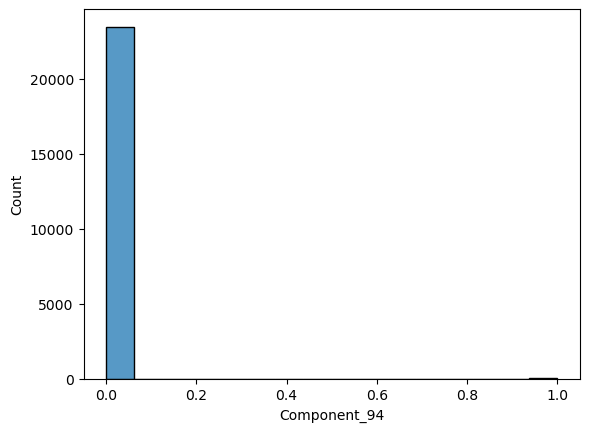

Column "Component_95" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


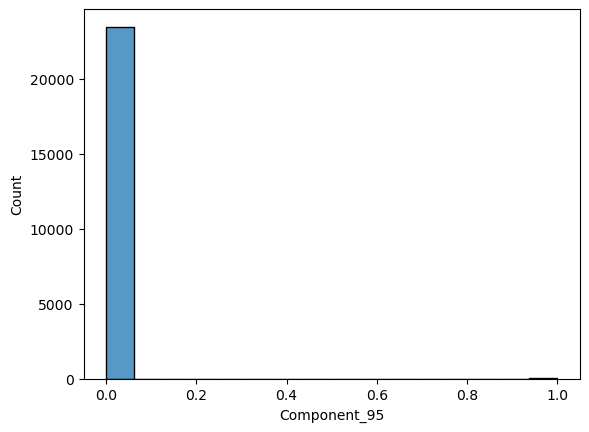

Column "Component_96" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


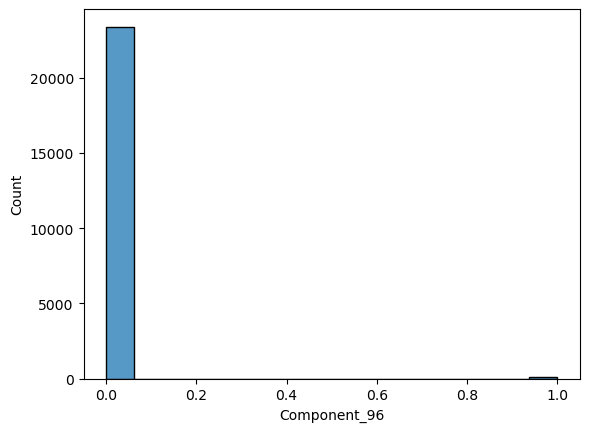

Column "Component_97" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


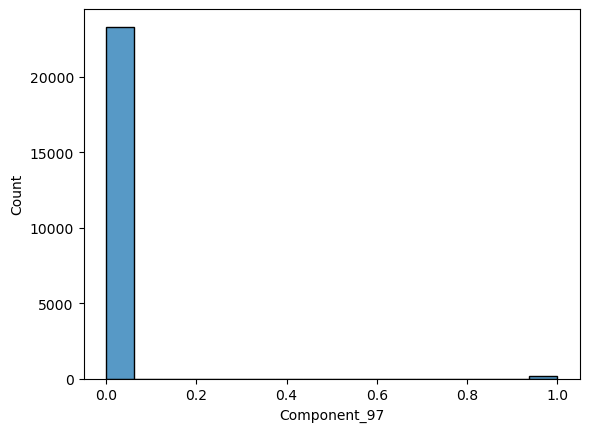

Column "Component_98" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


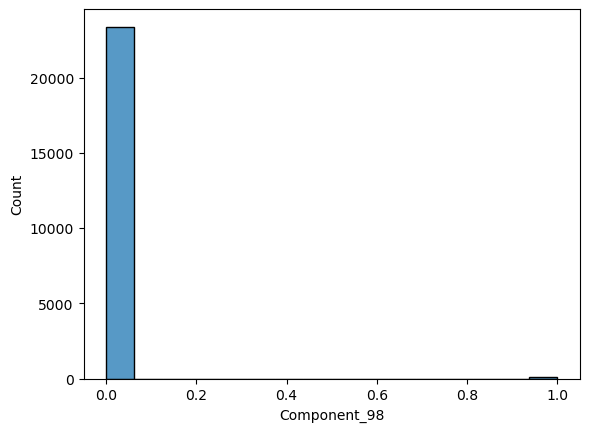

Column "Component_99" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


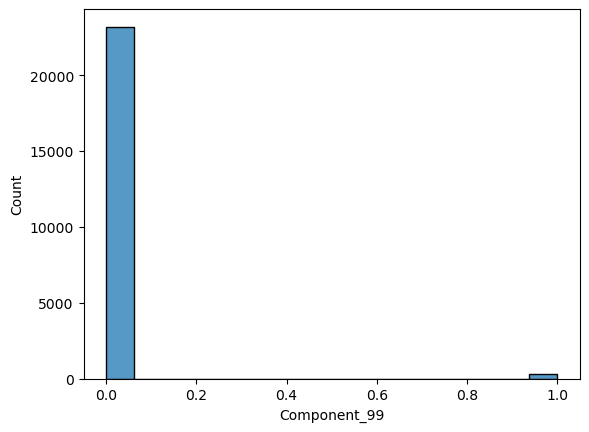

Column "Component_100" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


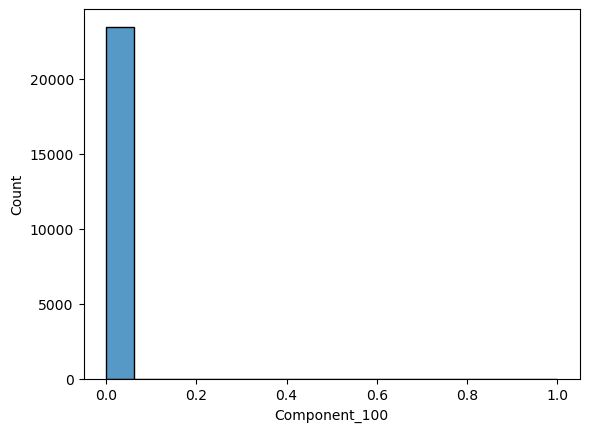

Column "Component_101" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


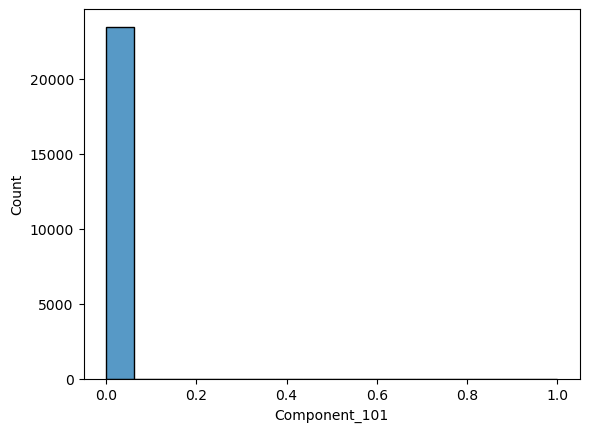

Column "Component_102" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


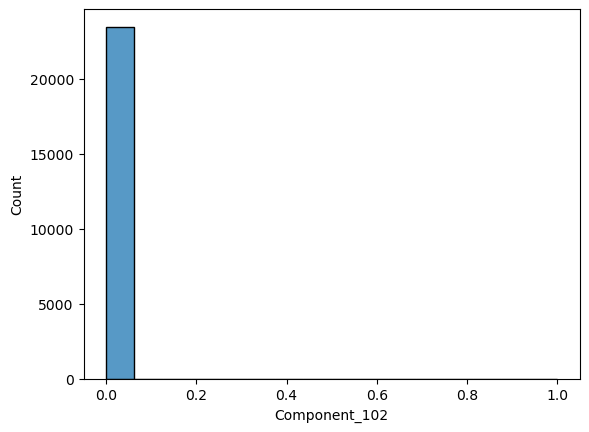

Column "Component_103" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


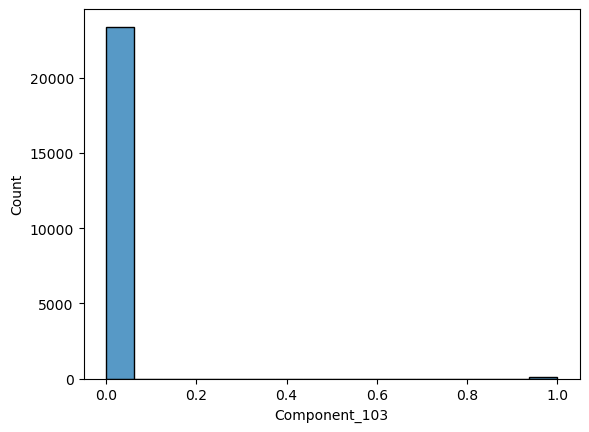

Column "Component_104" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


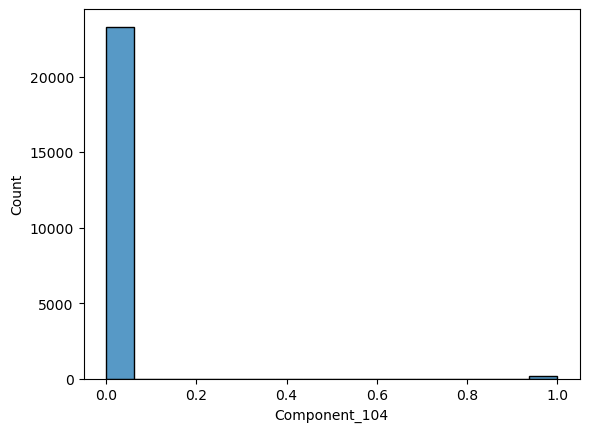

Column "Component_105" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


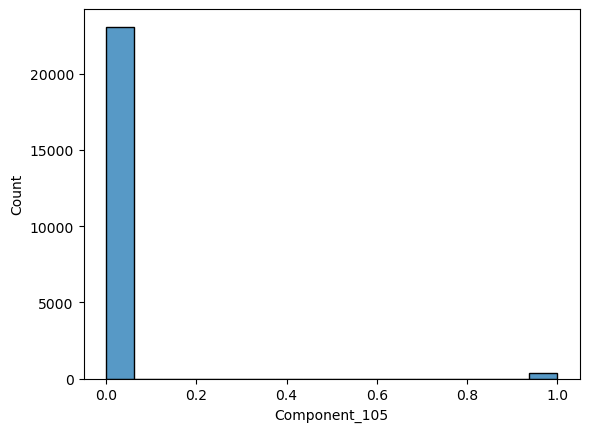

Column "Component_106" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


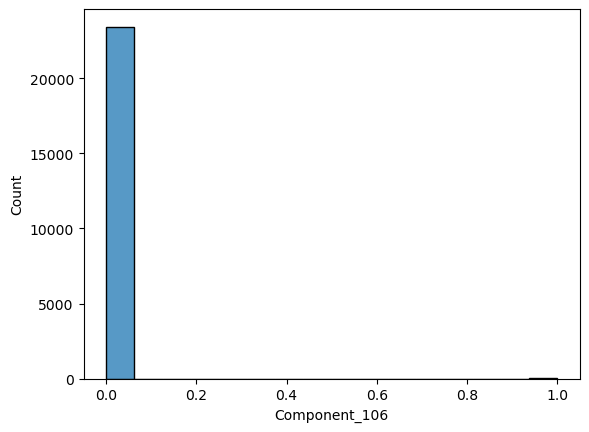

Column "Component_107" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


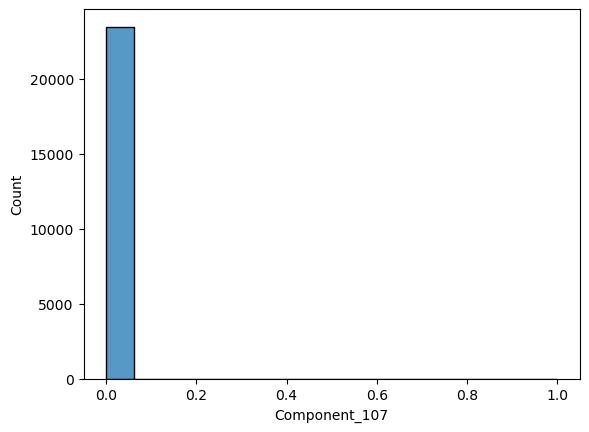

Column "Component_108" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


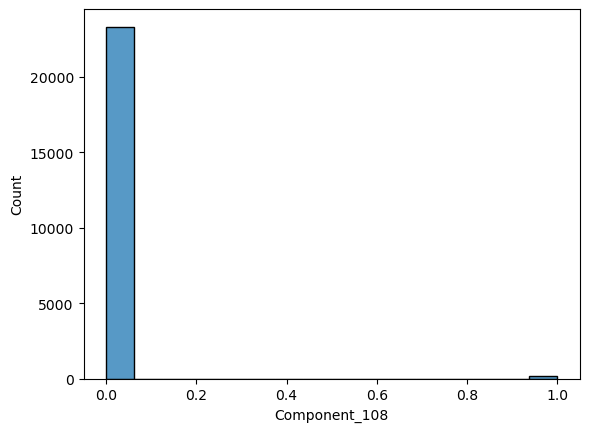

Column "Component_109" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


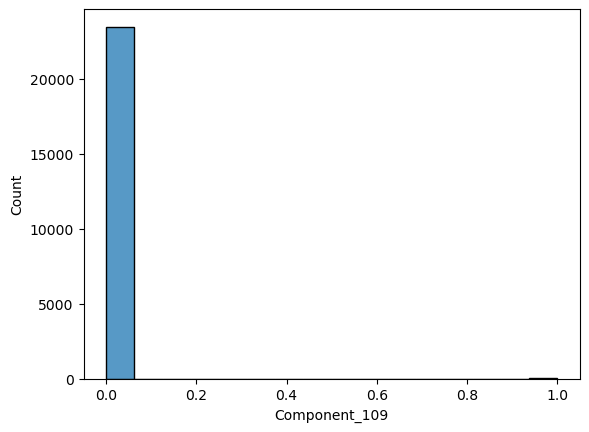

Column "Component_110" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


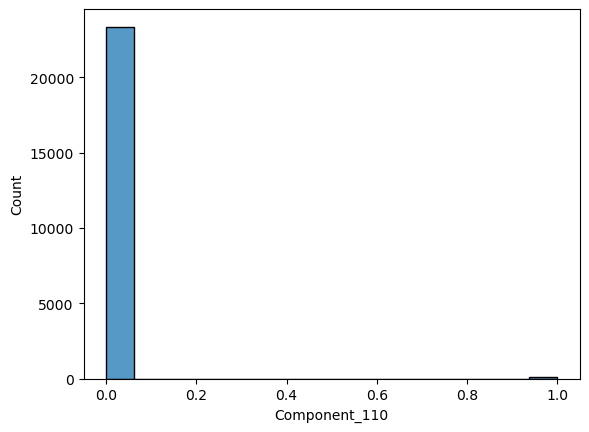

Column "Component_111" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


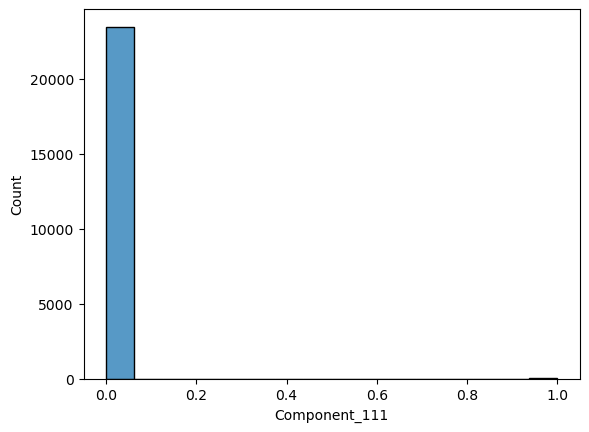

Column "Component_112" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


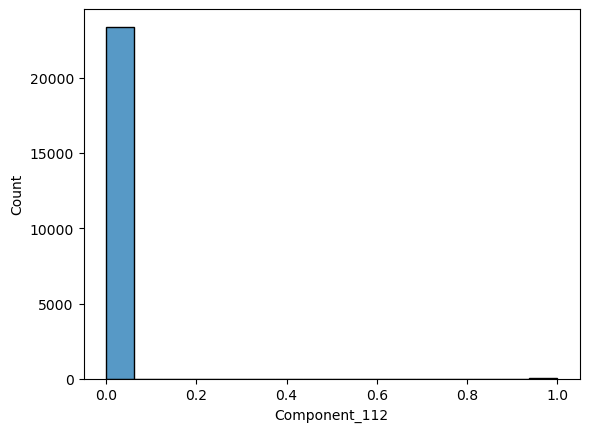

Column "Component_113" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


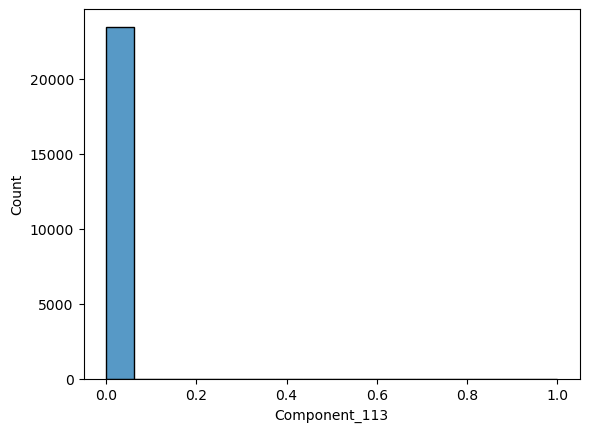

Column "Component_114" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


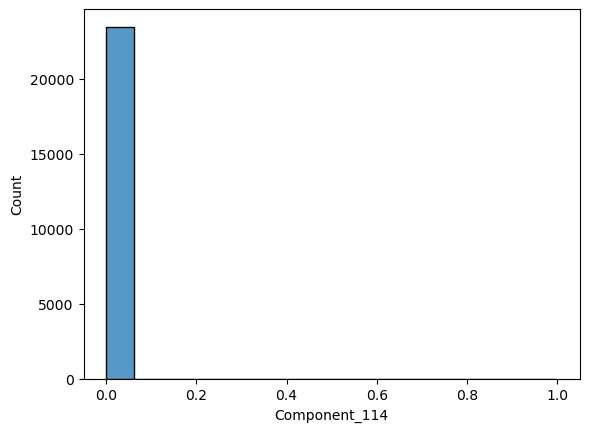

Column "Component_115" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


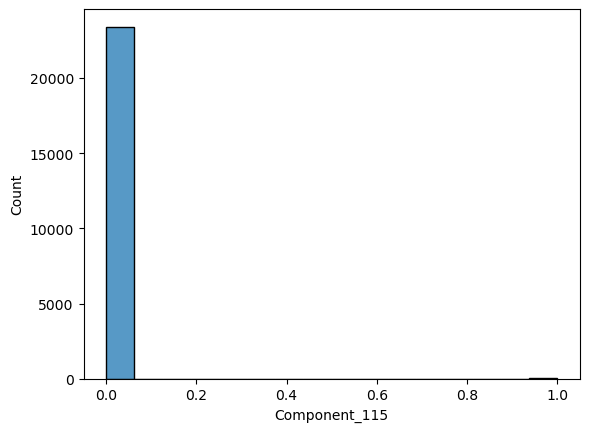

Column "Component_116" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


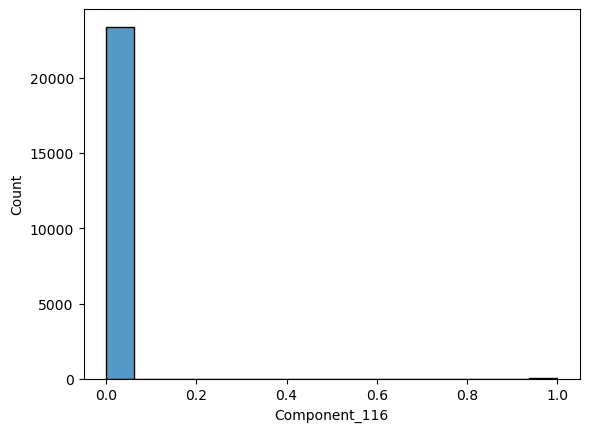

Column "Component_117" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


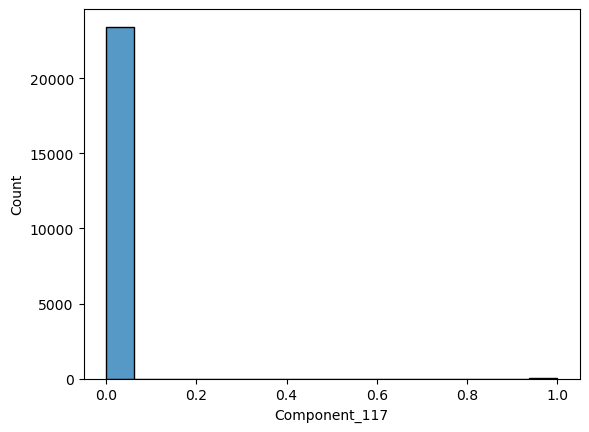

Column "Component_118" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


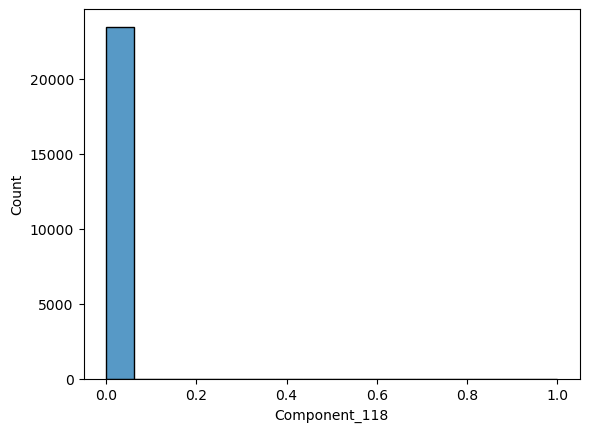

Column "Component_119" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


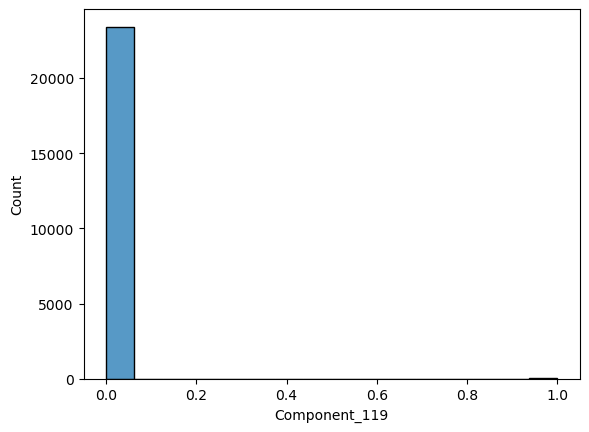

Column "Component_120" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


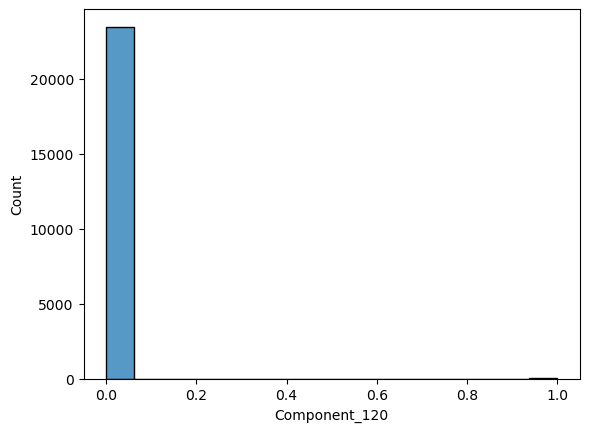

Column "Component_121" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


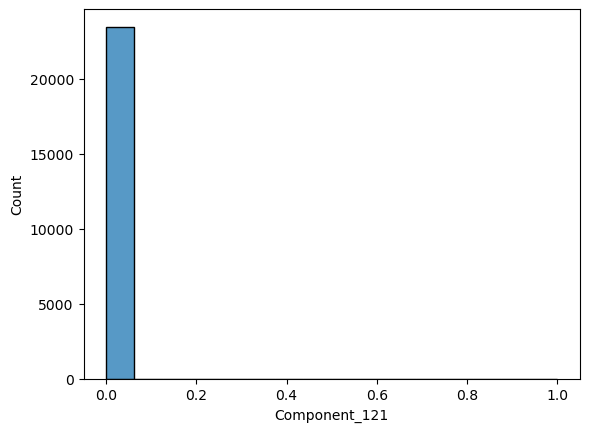

Column "Component_122" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


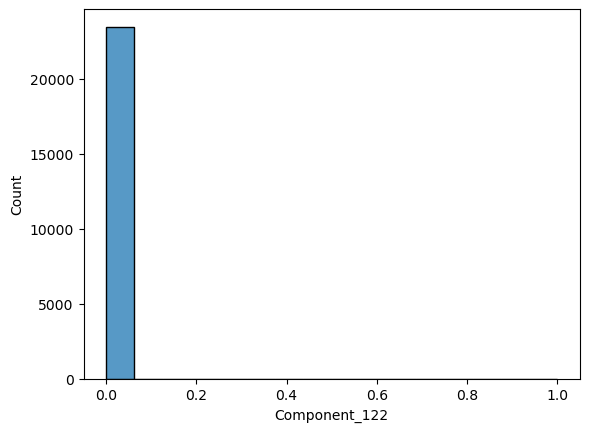

Column "Component_123" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


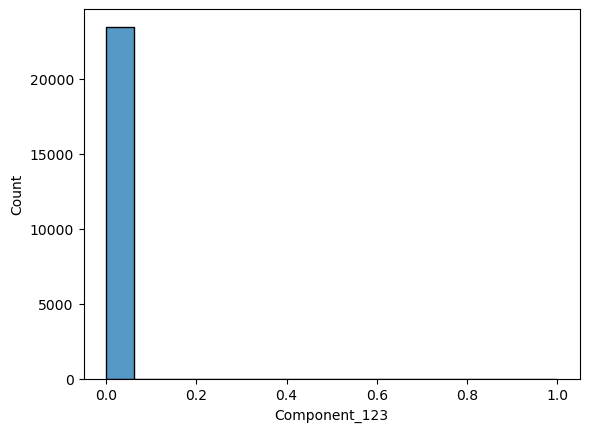

Column "Component_124" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


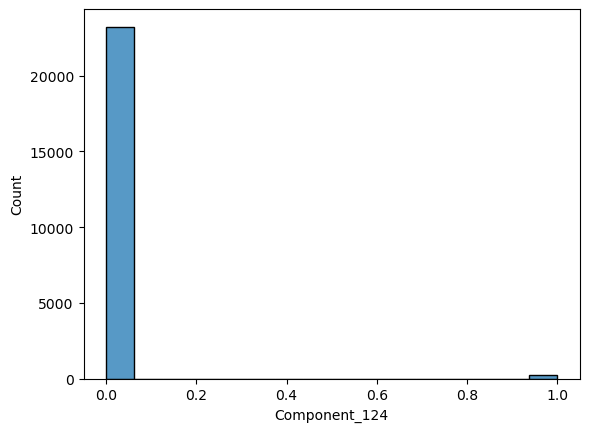

Column "Component_125" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


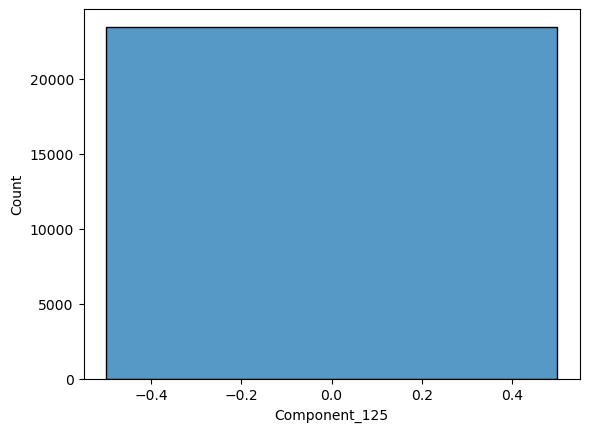

Column "Component_126" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


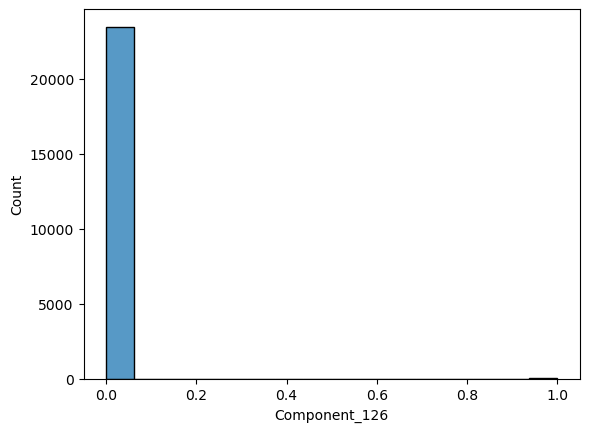

Column "Component_127" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


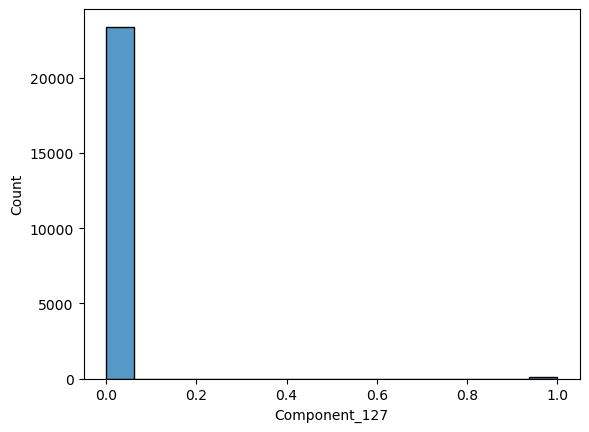

Column "Component_128" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


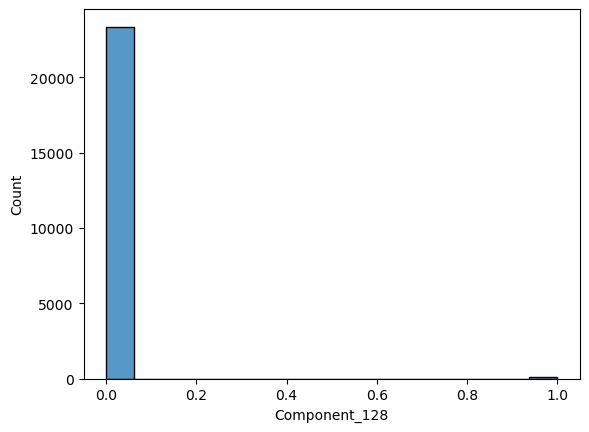

Column "Component_129" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


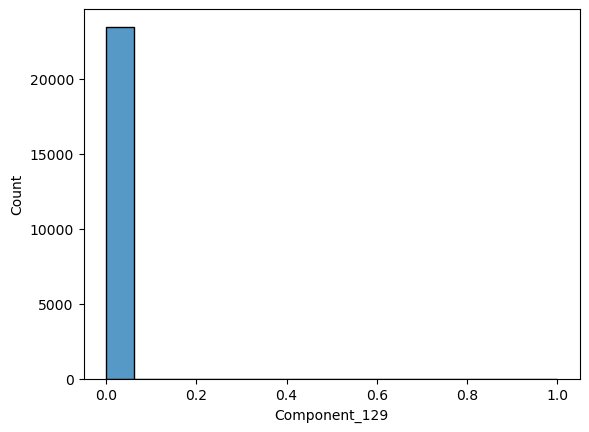

Column "Component_130" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


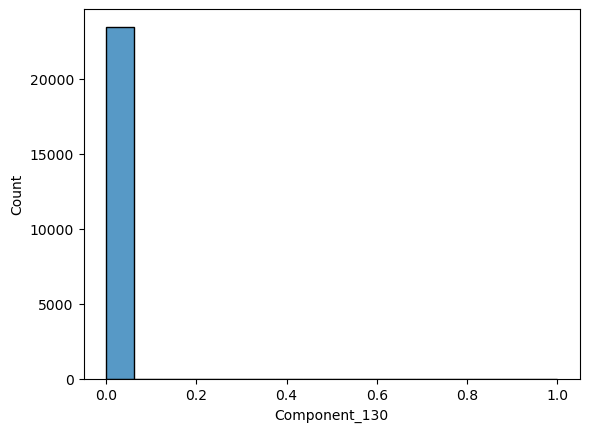

Column "Component_131" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


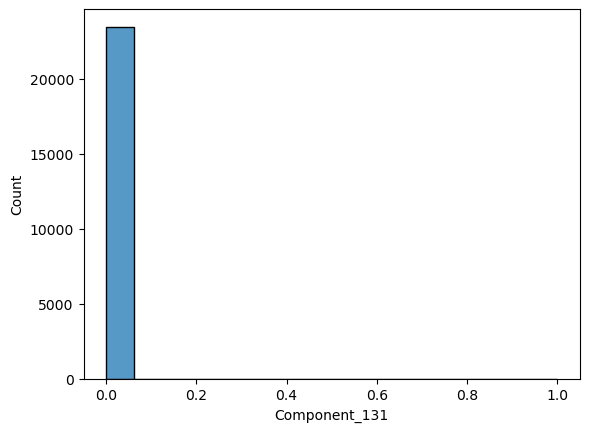

Column "Component_132" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


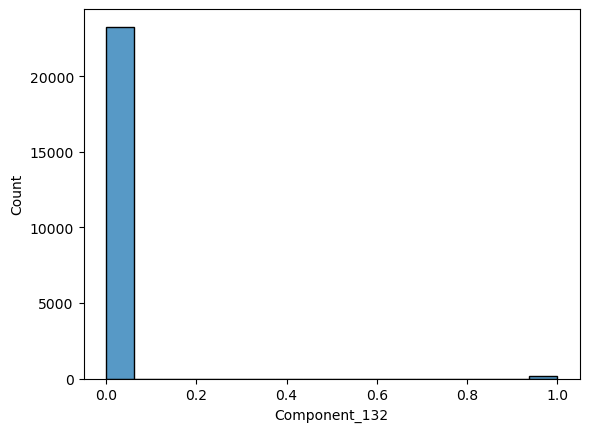

Column "Days_analysis" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


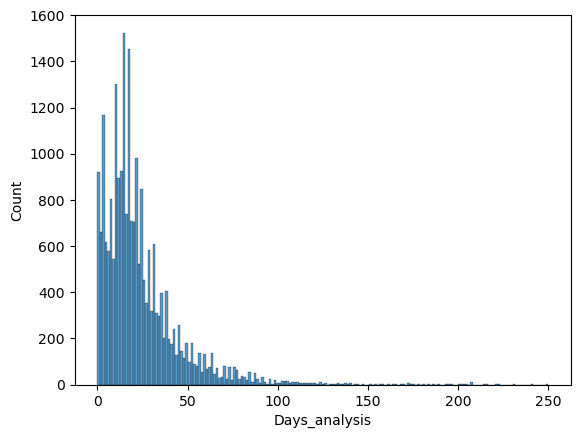

Column "Year" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


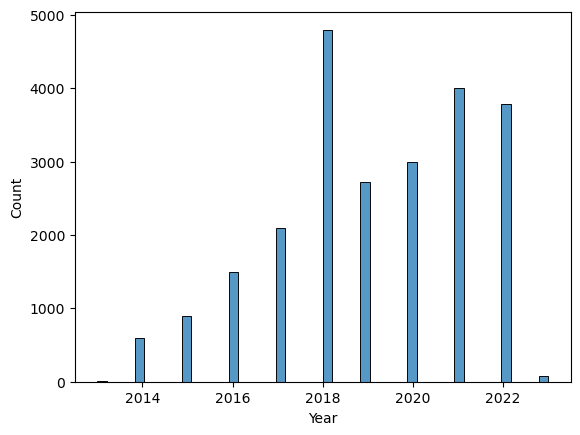

Column "Samples_number" distribution


/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


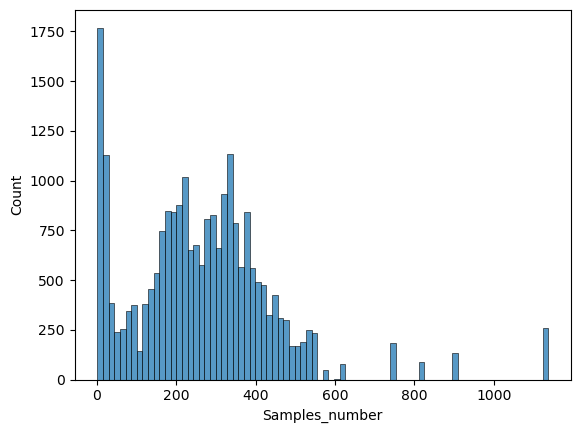

In [7]:
for col in check_colum:
    print(f'Column "{col}" distribution');
    hist = sns.histplot(data=data[col], label=f'Column "{col}" distribution');
    plt.show();

In [8]:
data['Component_125'].describe()

count    23478.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Component_125, dtype: float64

Обнаружена ошибка в признаке 'Component_125': все значения оказались нулевыми. После проверки исходных данных, было выяснено что это ошибка парсинга и компонент просто задвоился и должен быть удален.

In [9]:
data = data.drop('Component_125', axis=1)

Следует отметить, что заметна аномалия в количествах протоколов по годам. В 2018 году резко возросло количество анализов.

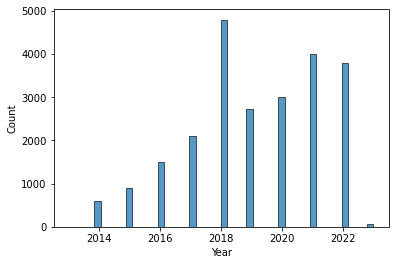

# Корреляция между количеством дней на анализ, годом и числом образцов

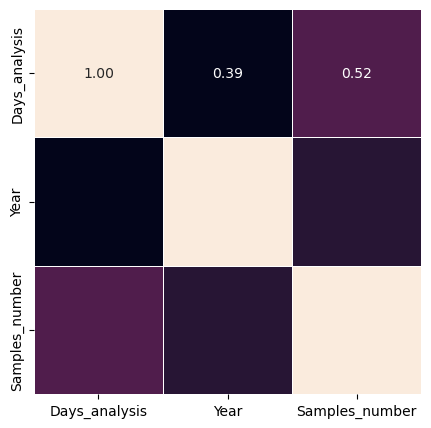

In [10]:
main_feature = 'Days_analysis'
corr_matrix = data[['Days_analysis', 'Year', 'Samples_number']]

plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

Наблюдаем наиболее сильную корреляцию между количеством дней на анализы и числом образцов. Хотя год также имеет сильную корреляцию.

/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/natasha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


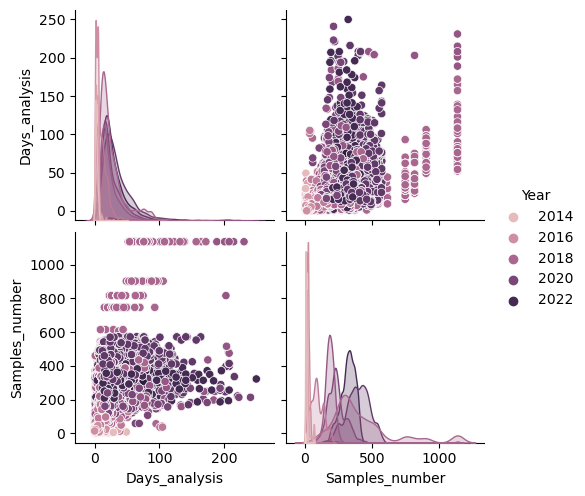

In [11]:
sns.pairplot(corr_matrix, hue='Year')
plt.show()         

Заметная корреляция между количеством образцов и продолжительностью анализов говорит о том, что этот показатель действительно может служить индикатором загруженности лаборатории.

# Борьба с аномалиями
Проверим распределение признаков 'Days_analysis', 'Year' и 'Samples_number'

['Days_analysis', 'Year', 'Samples_number']


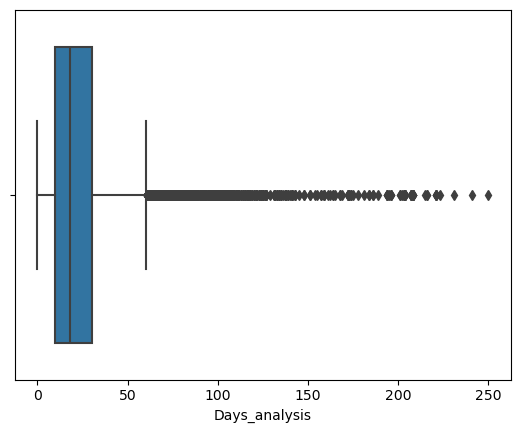

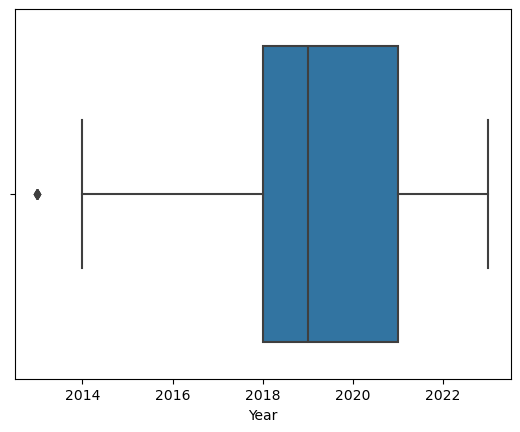

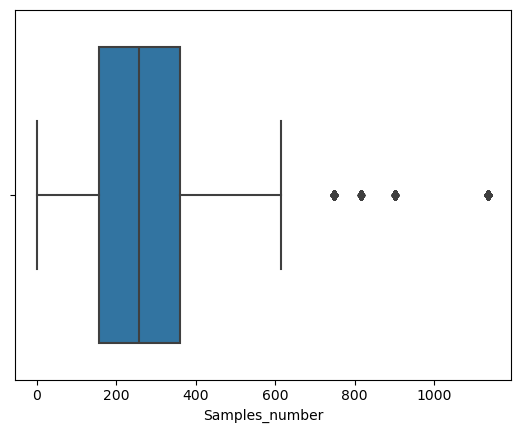

In [12]:
columns = ['Days_analysis', 'Year', 'Samples_number']
print(columns)
for feature in columns:
    sns.boxplot(x=feature, data=data)
    plt.show();

Распределение данных по количеству дней на анализы сильно асимметрично. Проверим возможность отбросить их часть.

In [13]:
perc_75, perc_25 = np.percentile(data['Days_analysis'],[75, 25])
IQR = perc_75 - perc_25
k = 1.5
np.round(data.drop(data[data['Days_analysis'] > perc_75 + k*IQR].index,
                   axis=0).shape[0] / data.shape[0], 2)

0.94

Рассмотрим возможность отбросить данные с вылетом 1,5 межквартильных диапазона за 75й перцентиль. При простом отбрасывании останется 94% данных. Но проверим возможно ли сократить потери.

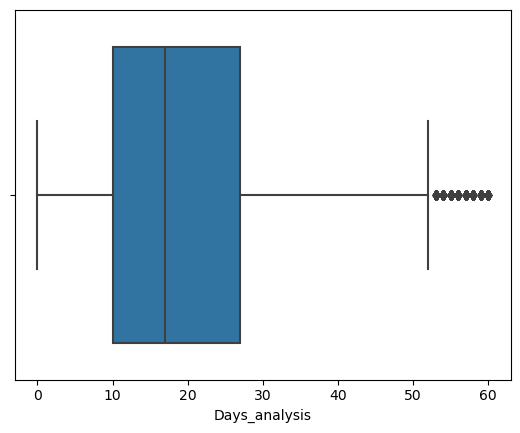

In [14]:
sns.boxplot(x='Days_analysis', data=data.drop(data[data['Days_analysis'] > perc_75 + k*IQR].index,
                   axis=0))
plt.show();

Проверим распределение вылетов в количестве дней на анализы по годам. Возможно выявим аномальный год.

In [15]:
data[data['Days_analysis'] > perc_75 + k*IQR].groupby('Year').count()

,Protocol_number,Product,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,...,Component_124,Component_126,Component_127,Component_128,Component_129,Component_130,Component_131,Component_132,Days_analysis,Samples_number
Year,,,,,,,,,,,,,,,,,,,,,
2017,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2018,436,436,436,436,436,436,436,436,436,436,...,436,436,436,436,436,436,436,436,436,436
2019,114,114,114,114,114,114,114,114,114,114,...,114,114,114,114,114,114,114,114,114,114
2020,127,127,127,127,127,127,127,127,127,127,...,127,127,127,127,127,127,127,127,127,127
2021,457,457,457,457,457,457,457,457,457,457,...,457,457,457,457,457,457,457,457,457,457
2022,296,296,296,296,296,296,296,296,296,296,...,296,296,296,296,296,296,296,296,296,296
2023,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


Никакой закономерности не выявлено. Поэтому пока остановимся на простом откидывании данных, выходящих за допуск.

Теперь рассмотрим данные с аномальными значениями числа образцов (более 650).

In [16]:
data[data['Samples_number'] > 650].groupby('Year').count()

,Protocol_number,Product,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,...,Component_124,Component_126,Component_127,Component_128,Component_129,Component_130,Component_131,Component_132,Days_analysis,Samples_number
Year,,,,,,,,,,,,,,,,,,,,,
2018,656,656,656,656,656,656,656,656,656,656,...,656,656,656,656,656,656,656,656,656,656
2019,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13


Особенно много таких образцов в 2018 году, когда резко возрасла загрузка лаборатории.

In [17]:
data[(data['Samples_number'] > 650) & (data['Year'] == 2018) ].groupby('Product').count()

,Protocol_number,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,...,Component_126,Component_127,Component_128,Component_129,Component_130,Component_131,Component_132,Days_analysis,Year,Samples_number
Product,,,,,,,,,,,,,,,,,,,,,
13,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
143,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
150,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
152,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
177,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
529,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
550,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [18]:
np.round(data.drop(data[data['Samples_number'] > 650].index,
                   axis=0).shape[0] / data.shape[0], 2)

0.97

Если мы отбросим все данные с числом образцов большим 650, то останется 97% данных.

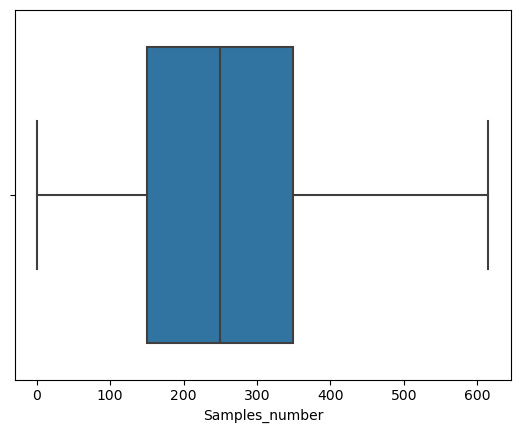

In [19]:
sns.boxplot(x='Samples_number', data=data.drop(data[data['Samples_number'] > 650].index,
                   axis=0))
plt.show();

In [20]:
np.round(data.drop(data[(data['Days_analysis'] > perc_75 + k*IQR) |
                        (data['Samples_number'] > 650)].index,
                   axis=0).shape[0] / data.shape[0], 2)

0.93

Теперь, если мы отбросим и данные с вылетами по количеству дней на анализы, и данные с вылетами по количеству образцов, останется 93% данных. При имеющемся количестве данных такие потери допустимы.

In [21]:
data = data.drop(data[(data['Days_analysis'] > perc_75 + k*IQR) |
                    (data['Samples_number'] > 650)].index,
                    axis=0)

Поработаем с распределением данных по годам.

In [22]:
corr_matrix.groupby('Year').describe()

Days_analysis                                                      \
             count       mean        std  min   25%   50%   75%    max   
Year                                                                     
2013           5.0   1.000000   0.000000  1.0   1.0   1.0   1.0    1.0   
2014         591.0   2.531303   3.125394  0.0   1.0   2.0   3.0   49.0   
2015         902.0   3.472284   2.805340  0.0   2.0   3.0   5.0   36.0   
2016        1493.0   3.533155   2.596865  0.0   2.0   3.0   5.0   36.0   
2017        2095.0  11.458234   9.037545  0.0   5.0  10.0  16.0  105.0   
2018        4798.0  25.803877  21.139236  1.0  12.0  18.0  32.0  172.0   
2019        2727.0  23.580858  21.660235  1.0  13.0  17.0  27.0  231.0   
2020        3001.0  25.620127  19.410452  2.0  14.0  20.0  32.0  241.0   
2021        4007.0  34.888944  24.189372  1.0  19.0  28.0  44.0  216.0   
2022        3786.0  29.968304  22.515600  1.0  17.0  23.0  36.0  250.0   
2023          73.0  30.000000  12.953978  0.0  23.0  25.0  37.0   75.0   

     Samples_number                                                      \
              count        mean         std    min    25%    50%    75%   
Year                                                                      
2013            5.0    1.400000    0.547723    1.0    1.0    1.0    2.0   
2014          591.0    7.142132    6.124978    1.0    4.0    6.0    9.0   
2015          902.0   17.302661   15.112173    2.0    9.0   13.0   18.0   
2016         1493.0   19.639652    9.107863    1.0   12.0   19.0   25.0   
2017         2095.0   89.741766   46.449094    8.0   54.5   88.0  128.0   
2018         4798.0  418.653189  241.847683   56.0  272.0  337.0  497.0   
2019         2727.0  189.398240   72.861544   77.0  165.0  184.0  205.0   
2020         3001.0  232.689104   65.150950   58.0  186.0  225.0  265.0   
2021         4007.0  394.067382   83.398052  169.0  336.0  396.0  454.0   
2022         3786.0  319.510829   53.437142  142.0  287.0  326.0  360.0   
2023           73.0  196.863014   58.223543   39.0  164.0  169.0  230.0   

              
         max  
Year          
2013     2.0  
2014    66.0  
2015    66.0  
2016    45.0  
2017   199.0  
2018  1137.0  
2019  1137.0  
2020   452.0  
2021   573.0  
2022   424.0  
2023   360.0

In [23]:
data.groupby('Year').describe()

Protocol_number                                                      \
               count          mean          std    min      25%      50%   
Year                                                                       
2013             5.0   2804.200000  2087.171699  785.0   879.00   2595.0   
2014           591.0   9858.076142  5833.598502   73.0  4898.00   9448.0   
2015           902.0   9920.456763  5756.279307    4.0  4996.75   9635.0   
2016          1493.0  11219.202947  6235.831369  106.0  5897.00  11104.0   
2017          2091.0  12494.441894  6602.154868    6.0  6877.50  13291.0   
2018          4071.0  12281.200933  6618.338857    7.0  6643.00  12524.0   
2019          2613.0  11974.101416  6457.361252    8.0  6606.00  12415.0   
2020          2874.0  11785.100209  6684.376299    9.0  6000.00  12005.5   
2021          3550.0  11802.181690  6920.454308   10.0  5629.25  11947.5   
2022          3490.0  10260.628653  6591.792109   11.0  4456.50   9757.0   
2023            70.0  12006.657143  6162.265234   72.0  7626.75  12151.5   

                        Product              ... Days_analysis        \
           75%      max   count        mean  ...           75%   max   
Year                                         ...                       
2013   4184.00   5578.0     5.0  158.400000  ...           1.0   1.0   
2014  14630.50  21523.0   591.0  285.578680  ...           3.0  49.0   
2015  14712.75  21370.0   902.0  308.962306  ...           5.0  36.0   
2016  16737.00  22634.0  1493.0  328.803751  ...           5.0  36.0   
2017  18345.00  22853.0  2091.0  319.060258  ...          15.5  52.0   
2018  18118.00  22881.0  4071.0  303.143945  ...          25.0  60.0   
2019  17587.00  22850.0  2613.0  328.905855  ...          25.0  60.0   
2020  17556.25  22875.0  2874.0  322.497216  ...          30.0  60.0   
2021  18001.50  22880.0  3550.0  323.203099  ...          37.0  60.0   
2022  15830.75  22879.0  3490.0  321.736103  ...          32.0  60.0   
2023  17406.50  21071.0    70.0  279.171429  ...          32.0  60.0   

     Samples_number                                                             
              count        mean         std    min    25%    50%    75%    max  
Year                                                                            
2013            5.0    1.400000    0.547723    1.0    1.0    1.0    2.0    2.0  
2014          591.0    7.142132    6.124978    1.0    4.0    6.0    9.0   66.0  
2015          902.0   17.302661   15.112173    2.0    9.0   13.0   18.0   66.0  
2016         1493.0   19.639652    9.107863    1.0   12.0   19.0   25.0   45.0  
2017         2091.0   89.839311   46.439651    8.0   55.0   88.0  128.0  199.0  
2018         4071.0  335.692213  119.640331   56.0  268.0  317.0  418.0  615.0  
2019         2613.0  183.133563   29.023400   77.0  165.0  183.0  204.0  258.0  
2020         2874.0  233.432150   65.601162   85.0  186.0  227.0  265.0  452.0  
2021         3550.0  388.846761   82.095750  177.0  331.0  387.0  448.0  573.0  
2022         3490.0  318.863037   53.807291  142.0  286.0  324.0  360.0  424.0  
2023           70.0  190.985714   51.616617   39.0  164.0  169.0  222.0  333.0  

[11 rows x 1080 columns]

Отбросим данные за 2013 и 2023 года, так как их мало.

In [24]:
data = data.drop(data[data['Year'] == 2013].index, axis=0)
data = data.drop(data[data['Year'] == 2023].index, axis=0)

# Средняя продолжительность анализов для различных продуктов

In [25]:
data.groupby('Product').mean()['Days_analysis']

Product
1      31.125000
2      31.000000
7      31.500000
8      18.333333
9      34.500000
         ...    
565    20.741573
566    23.285714
567    29.777778
568    27.730769
569    33.000000
Name: Days_analysis, Length: 522, dtype: float64

Будем рассматривать только продукты, которых произведено более 10 серий.

In [26]:
time_spendings = data.groupby('Product').mean()['Days_analysis']
num = data.groupby('Product').size()
df = pd.DataFrame(data=time_spendings)
df['Size'] = num
df.head(5)
df.to_csv('time spendings.csv')

In [27]:
df[(df['Days_analysis']>10) & (df['Size']>10)].sort_values('Days_analysis', ascending=False)

,Days_analysis,Size
Product,,
361,43.971429,35
439,41.238095,42
441,39.547619,42
251,36.090909,11
442,35.846154,13
...,...,...
309,10.659341,182
562,10.613169,243
455,10.581395,43


In [28]:
data.describe()

,Protocol_number,Product,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,...,Component_126,Component_127,Component_128,Component_129,Component_130,Component_131,Component_132,Days_analysis,Year,Samples_number
count,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,...,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,21675.000000,21675.00000,21675.000000
mean,11557.708697,318.160877,0.151972,0.216332,0.243230,0.209273,0.187543,0.292503,0.267958,0.207705,...,0.000692,0.003645,0.005859,0.000369,0.000092,0.000046,0.009227,19.312157,2019.05301,242.041845
std,6624.456403,126.783291,0.359002,0.411753,0.429042,0.406799,0.390356,0.454923,0.444258,0.405674,...,0.026298,0.060263,0.076323,0.019209,0.009606,0.006792,0.095616,13.393288,2.18527,144.769146
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.00000,1.000000
25%,5808.500000,221.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2018.00000,142.000000
50%,11629.000000,305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,2019.00000,245.000000
75%,17355.500000,418.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,2021.00000,347.000000
max,22881.000000,569.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000,2022.00000,615.000000


In [29]:
data.to_csv('clean_data.csv', index=False)